<a href="https://colab.research.google.com/github/boomThawa/walmart/blob/main/Project_Walmart_Dataset_(Retail)_dataset_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DSI205: Linear Algebra for Data Analysis**
###**Walmart Store sales dataset**
Historical sales data of the walmart store

> Walmart มีข้อมูลการขายที่มีประสิทธิภาพสูงในหลายปีซึ่งสามารถใช้ในการ วิเคราะห์เพื่อหาความสัมพันธ์ระหว่างตัวแปรต่าง ๆ เช่น ราคาน้ำมัน, อัตราการว่างงาน, อุณหภูมิ และการใช้วันหยุดต่าง ๆ ในการคาดการณ์ยอดขาย


ทั้งนี้การวิเคราะห์ข้อมูลเหล่านี้สามารถช่วยให้ผู้บริหารตัดสินใจได้ดียิ่งขึ้น เช่น การวางแผนการจัดการสินค้าในช่วงเทศกาล หรือการปรับกลยุทธ์การตลาดให้เหมาะสมกับช่วงเวลาหรือสภาพแวดล้อมทางเศรษฐกิจ

## Collection

Import Libary

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

### **Data dictionary**
Walmart Store sales dataset

source:
 [https://www.kaggle.com/datasets/rutuspatel/walmart-dataset-retail](https://www.kaggle.com/datasets/rutuspatel/walmart-dataset-retail)

**Walmart Store sales dataset**

แสดงข้อมูลประวัติการขายที่ครอบคลุมช่วงตั้งแต่วันที่ 5 กุมภาพันธ์ 2010 ถึง 1 พฤศจิกายน 2012  
ซึ่งประกอบไปด้วยข้อมูลดังนี้:
* **Store** - หมายเลขของร้าน
* **Date** - สัปดาห์ของการขาย
* **Weekly_Sales** - ยอดขายของร้านนั้น ๆ
* **Holiday_Flag** - สถานะของสัปดาห์ว่าเป็นสัปดาห์วันหยุดพิเศษหรือไม่ 1 – สัปดาห์วันหยุดพิเศษ 0 – สัปดาห์ที่ไม่ใช่วันหยุด
* **Temperature** - อุณหภูมิในวันที่มีการขาย
* **Fuel_Price** - ราคาน้ำมันในภูมิภาคนั้น
* **CPI** – ดัชนีราคาผู้บริโภคในช่วงเวลานั้น
* **Unemployment** - อัตราการว่างงานในช่วงเวลานั้น
เหตุการณ์วันหยุด
  1.   Super Bowl: 12 ก.พ. 2010, 11 ก.พ. 2011, 10 ก.พ. 2012, 8 ก.พ. 2013
  2.   Labour Day: 10 ก.ย. 2010, 9 ก.ย. 2011, 7 ก.ย. 2012, 6 ก.ย. 2013
  3.   Thanksgiving: 26 พ.ย. 2010, 25 พ.ย. 2011, 23 พ.ย. 2012, 29 พ.ย. 2013
  4.   Christmas: 31 ธ.ค. 2010, 30 ธ.ค. 2011, 28 ธ.ค. 2012, 27 ธ.ค. 2013

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
! pip install kaggle

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


ดาวน์โหลดไฟล walmart-dataset-retail .zip จาก Kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!kaggle datasets download -d rutuspatel/walmart-dataset-retail

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset URL: https://www.kaggle.com/datasets/rutuspatel/walmart-dataset-retail
License(s): unknown
walmart-dataset-retail.zip: Skipping, found more recently modified local copy (use --force to force download)


แตกไฟล์ .zip ที่ดาวน์โหลดมา

In [ ]:
import zipfile
with zipfile.ZipFile("walmart-dataset-retail.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")  # แตกไฟล์ไปยังโฟลเดอร์ /content

ตรวจสอบไฟล์ที่ได้

In [ ]:
import os
for file in os.listdir("/content"):
    if file.endswith(".csv"):
        print(file)  # แสดงชื่อไฟล์ .csv ที่ได้

Walmart_Store_sales.csv


โหลดข้อมูลจากไฟล์ CSV และแสดง DataFrame บนหน้าจอ เพื่อตรวจสอบข้อมูลที่ถูกโหลดมาให้แน่ใจว่ามันถูกต้อง และนำไปในการวิเคราะห์ข้อมูลที่ต้องการ

In [ ]:
df = pd.read_csv('Walmart_Store_sales.csv')

df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


แสดงจำนวนแถวและคอลัมน์ของ DataFrame ที่ได้มา โดยใช้ข้อมูลจากตัวแปร rows และ cols ที่เก็บจำนวนแถวและคอลัมน์ตามลำดับในขั้นตอนก่อนหน้านี้

In [ ]:
rows , col =  df.shape
print(f"Number of Rows : {rows} \nNumber of Columns : {col}")

Number of Rows : 6435 
Number of Columns : 8


การเรียกดูข้อมูลที่มีค่าที่ไม่ซ้ำกันในคอลัมน์

In [ ]:
for col in df.columns:
    print(f"{col} Data has :", df[col].unique(), "\n")

Store Data has : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45] 

Date Data has : ['05-02-2010' '12-02-2010' '19-02-2010' '26-02-2010' '05-03-2010'
 '12-03-2010' '19-03-2010' '26-03-2010' '02-04-2010' '09-04-2010'
 '16-04-2010' '23-04-2010' '30-04-2010' '07-05-2010' '14-05-2010'
 '21-05-2010' '28-05-2010' '04-06-2010' '11-06-2010' '18-06-2010'
 '25-06-2010' '02-07-2010' '09-07-2010' '16-07-2010' '23-07-2010'
 '30-07-2010' '06-08-2010' '13-08-2010' '20-08-2010' '27-08-2010'
 '03-09-2010' '10-09-2010' '17-09-2010' '24-09-2010' '01-10-2010'
 '08-10-2010' '15-10-2010' '22-10-2010' '29-10-2010' '05-11-2010'
 '12-11-2010' '19-11-2010' '26-11-2010' '03-12-2010' '10-12-2010'
 '17-12-2010' '24-12-2010' '31-12-2010' '07-01-2011' '14-01-2011'
 '21-01-2011' '28-01-2011' '04-02-2011' '11-02-2011' '18-02-2011'
 '25-02-2011' '04-03-2011' '11-03-2011' '18-03-2011' '25-03-2011'
 '01-04-2011' '08-04-2011' '15-04-2

การแสดงข้อมูลทั่วไปเกี่ยวกับ DataFrame :

* Column: ชื่อของคอลัมน์ใน DataFrame
* Non-Null Count: จำนวนค่าที่ไม่ใช่
* missing/null ในแต่ละคอลัมน์
* Dtype: ประเภทของข้อมูลของแต่ละคอลัมน์

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


แสดงข้อมูลทางสถิติเบื้องต้น เกี่ยวกับ DataFrame :

* count: จำนวนค่าที่ไม่เป็นค่าว่างในแต่ละคอลัมน์
* mean: ค่าเฉลี่ยของแต่ละคอลัมน์
* std: ส่วนเบี่ยงเบนมาตรฐาน (Standard Deviation)
* min: ค่าต่ำสุด
* 25%: ค่าของควอร์ไทล์ที่หนึ่ง (25th percentile)
* 50%: ค่ามัธยฐาน (Median หรือ 50th percentile)
* 75%: ค่าของควอร์ไทล์ที่สาม (75th percentile)
* max: ค่าสูงสุด

In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000







---





## Data Preparation

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


#####**ข้อตกลงต้นในการวิเคราะห์การถดถอยเชิงเส้น**
อ้างอิงทฤษฎีจาก : https://mis.nurse.cmu.ac.th/mis/download/course/lec_567730_lesson_08.pdf
1. **ตัวแปรอิสระและตัวแปรตามต้องมีมาตรวัดเป็น Interval ขึ้นไป**

ตัวแปรตาม (Dependent Variable):
ในกรณีนี้ Weekly_Sales คือ ตัวแปรตามที่ต้องพยากรณ์ ซึ่งมีลักษณะเป็นค่าตัวเลข (เชิงปริมาณ) จึงเหมาะสมที่จะใช้ในการวิเคราะห์การถดถอยเชิงเส้น
ตัวแปรอิสระ (Independent Variables):
ตัวแปรอิสระต่างๆ ใน dataset เช่น Temperature, Fuel_Price, CPI, Unemployment, employment, Date ซึ่งทั้งหมดเป็นตัวแปรเชิงปริมาณ (Quantitative Variables)
บางตัวแปรที่มีลักษณะเป็น Categorical Variables คือ  Holiday_Flag และ Store ที่ต้องแปลงให้เป็น One-Hot Encoding ก่อนนำไปใช้ในการวิเคราะห์


2. **ข้อมูลต้องมาจากประชากรที่มีการแจกแจงแบบปกติ (Normal Distribution)**

ตรวจสอบการแจกแจงของ ตัวแปรอิสระ และ ตัวแปรตาม ว่ามีการแจกแจงที่เป็นแบบปกติหรือไม่ เช่น
การทดสอบ Shapiro-Wilk Test หรือ Q-Q Plot สามารถใช้ในการตรวจสอบการแจกแจงของตัวแปรต่างๆ เพื่อให้แน่ใจว่าไม่มีปัญหาด้านการแจกแจงที่ผิดปกติ
สามารถใช้ histograms หรือ box plots เพื่อเช็คการกระจายของข้อมูลที่เป็นตัวแปรเชิงปริมาณ


3. **ตัวแปรอิสระไม่ควรมีความสัมพันธ์กันมาก (Multicollinearity)**

ควรตรวจสอบว่าไม่มี Multicollinearity ระหว่างตัวแปรอิสระ โดยใช้ Variance Inflation Factor (VIF) หากค่า VIF สูงกว่าค่า 10 นั้นแสดงว่า ตัวแปรอิสระมีความสัมพันธ์กันสูงจนอาจทำให้โมเดลไม่เสถียร
สามารถใช้ Correlation Matrix เพื่อดูความสัมพันธ์ระหว่างตัวแปรอิสระ และตรวจสอบว่าตัวแปรใดที่มีความสัมพันธ์สูงเกินไป และอาจพิจารณาตัดออกหรือลดความสัมพันธ์โดยใช้เทคนิค Principal Component Analysis (PCA) หรือ Feature Selection

4. **ข้อมูลต้องไม่มีความสัมพันธ์ในตัวเอง (Autocorrelation)**

ข้อมูลควรจะไม่มี Autocorrelation หรือความสัมพันธ์ในค่าคลาดเคลื่อน (residuals)
สามารถตรวจสอบโดยใช้ Durbin-Watson Test ซึ่งจะช่วยให้เราทราบว่า residuals มีการพึ่งพาอาศัยกันหรือไม่ หากค่า Durbin-Watson อยู่ใกล้เคียงกับ 2 จะหมายถึงว่าไม่มีความสัมพันธ์ในตัวเอง


5. **ค่าคลาดเคลื่อน (Residuals) ของการพยากรณ์จะต้อง**

  1. ต้องมีการแจกแจงแบบปกติ (Assumption of Normality)

      ค่าคลาดเคลื่อนที่เกิดจากการพยากรณ์ (Residuals) ควรมีการแจกแจงแบบปกติ (Normality)สามารถทดสอบการแจกแจงของ residuals ได้โดยใช้ Histogram หรือ Q-Q Plot หากค่าคลาดเคลื่อนกระจายใกล้เคียงกับการแจกแจงแบบปกติ ก็แสดงว่าเป็นไปตามสมมติฐาน ค่าคลาดเคลื่อนควรมีค่าเฉลี่ยเท่ากับ 0 และความแปรปรวนคงที่

  2. มีค่าเฉลี่ยเท่ากับ 0 (Mean Zero)

      ค่าคลาดเคลื่อน (Residuals) ควรมีค่าเฉลี่ยเท่ากับ 0 ซึ่งหมายความว่าโมเดลไม่ได้มีการบิด (Bias) หรือมีการประมาณค่าที่สูงหรือต่ำเกินไปโดยทั่วไป
      วิธีการตรวจสอบ:
      คำนวณค่าเฉลี่ยของ residuals และตรวจสอบว่าใกล้เคียงกับ 0 หรือไม่

  3. ความแปรปรวนคงที่ (Homoscedasticity)

      ความแปรปรวนของ residuals ควรจะคงที่ในทุกระดับของตัวแปรอิสระ ซึ่งจะทำให้ค่าคลาดเคลื่อนไม่มีการกระจายที่แตกต่างกันมากในแต่ละค่า
      สามารถทดสอบ Homoscedasticity ได้โดยใช้ Breusch-Pagan Test หรือดูกราฟของ Residuals vs Fitted Values ซึ่งไม่ควรมีรูปแบบที่ชัดเจน

  4. ความคลาดเคลื่อนเป็นอิสระกัน (Assumption of Autocorrelation)
     ค่าคลาดเคลื่อน (Residuals) ควรเป็นอิสระจากกัน หมายความว่าไม่มีการพึ่งพา (Dependence) กันในข้อมูลหรือระหว่างค่าคลาดเคลื่อน
     วิธีการตรวจสอบ:
     การใช้ Durbin-Watson Test เพื่อตรวจสอบการมีหรือไม่มี Autocorrelation ของ residuals
     ค่า Durbin-Watson ที่ใกล้เคียงกับ 2 แสดงว่าไม่มีการพึ่งพากันใน residuals



####1. Data Cleaning

##### **Missing Values**

ตรวจสอบข้อมูลที่ขาดหายในแต่ละคอลัมน์

เป็นขั้นตอนสำคัญในการทำความสะอาดข้อมูล (data cleaning) เพื่อเตรียมข้อมูลสำหรับการวิเคราะห์หรือการสร้างโมเดล

In [ ]:
missing_data = df.isnull().sum()
print(f"\nMissing Data:\n{missing_data}")


Missing Data:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64




```
จากการตรวจสอบ ไม่พบ Missing Values
```


##### **Duplicated Data**

ค้นหาข้อมูลที่ซ้ำกันใน DataFrame เพื่อตรวจสอบคุณภาพข้อมูลหรือตรวจหาข้อผิดพลาดที่อาจเกิดขึ้นจากการป้อนข้อมูลซ้ำ

In [ ]:
df[df.duplicated()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment




```
จากการตรวจสอบ ไม่พบ Duplicated Data
```



##### **Fixing Outliers**

**ตรวจหาค่าที่ผิดปกติหรือค่า outliers**

การตรวจหาค่าผิดปกติ (outliers) ในคอลัมน์ Weekly_Sales โดยใช้วิธี Interquartile Range (IQR) โดยกำหนดขอบเขตล่างและบนด้วย Q1 และ Q3 ซึ่งช่วยให้เราสามารถแยกแถวข้อมูลที่มีค่า outliers ออกมาเพื่อทำการลบข้อมูลที่มีค่าผิดปกติออก เพื่อให้การวิเคราะห์มีข้อมูลที่แม่นยำมากขึ้น

In [ ]:
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Weekly_Sales'] < (Q1 - 1.5 * IQR)) | (df['Weekly_Sales'] > (Q3 + 1.5 * IQR))]

In [ ]:
outliers_sales = outliers[['Weekly_Sales']]
outliers_sales.head()

,Weekly_Sales
189,3436007.68
241,3224369.80
471,2789469.45
474,2740057.14
475,3526713.39


In [ ]:
df[~((df['Weekly_Sales'] < (Q1 - 1.5 * IQR)) | (df['Weekly_Sales'] > (Q3 + 1.5 * IQR)))]
df.sample(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6063,43,11-03-2011,629026.75,0,60.24,3.459,205.988071,10.398
4608,33,17-09-2010,246277.18,0,89.43,3.028,126.145467,9.495
5842,41,08-06-2012,1436383.84,0,65.11,3.741,197.655186,6.547
5729,41,09-04-2010,1082158.21,0,37.30,2.750,189.690101,7.363
5557,39,15-06-2012,1587499.82,0,81.33,3.393,220.449415,6.989
1261,9,04-05-2012,586289.08,0,78.98,3.749,225.422758,5.539
946,7,14-10-2011,501959.19,0,32.65,3.491,195.026101,8.513
4884,35,09-07-2010,1268766.76,0,82.69,2.793,136.396264,8.861
1032,8,10-09-2010,831425.20,1,74.34,2.565,214.852873,6.315
4814,34,02-12-2011,988742.08,0,39.75,3.176,129.845967,10.148


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


การนับจำนวนข้อมูลที่เหลือจากการ clean weekly_sales

In [ ]:
rows_cleaned, col_cleaned = df.shape
print(f"\nAfter Cleaning:\nNumber of Rows : {rows_cleaned} \nNumber of Columns : {col_cleaned}")


After Cleaning:
Number of Rows : 6435 
Number of Columns : 8




---



#####  Date

In [ ]:
df[['Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    6435 non-null   object
dtypes: object(1)
memory usage: 50.4+ KB


**จาก Datatype ข้อมูลในคอลัมน์** Date คือสตริงที่แสดงวันที่ในรูปแบบข้อความ (object) และต้องแปลงเป็นชนิดข้อมูล datetime เพื่อให้สามารถทำการคำนวณหรือกรองข้อมูลตามวันที่ได้สะดวกมากขึ้น
```
 dtypes: object ▶ datetime
```

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [ ]:
df[['Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6435 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 50.4 KB


##### Categorical Variables


**Assumptions 1**
ตัวแปรอิสระและตัวแปรตามต้องมีมาตรวัดเป็น Interval ขึ้นไป
1. **ตัวแปรตาม** (Dependent Variable)
ในกรณีนี้ Weekly_Sales คือ ตัวแปรตามที่ต้องพยากรณ์ ซึ่งมีลักษณะเป็นค่าตัวเลข (เชิงปริมาณ) จึงเหมาะสมที่จะใช้ในการวิเคราะห์การถดถอยเชิงเส้น
2. **ตัวแปรอิสระ** (Independent Variables):
ตัวแปรอิสระต่างๆ ใน dataset เช่น Temperature, Fuel_Price, CPI, employment, Date ซึ่งทั้งหมดเป็นตัวแปรเชิงปริมาณ (Quantitative Variables)
บางตัวแปรที่มีลักษณะเป็น Categorical Variables คือ  Holiday_Flag และ Store ที่ต้องแปลงให้เป็น One-Hot Encoding ก่อนนำไปใช้ในการวิเคราะห์


In [ ]:
from sklearn.preprocessing import OneHotEncoder
data = df.copy()

# เลือกคอลัมน์ที่ต้องการ One-Hot Encoding
categorical_columns = ['Store', 'Holiday_Flag']

# Check if the columns exist in the DataFrame
for col in categorical_columns:
    if col not in data.columns:
        print(f"Warning: Column '{col}' not found in DataFrame. Check for typos or if the column has been removed.")

# Use OneHotEncoder, change 'sparse' to 'sparse_output'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Changed 'sparse' to 'sparse_output' to match the updated API.
encoded_data = encoder.fit_transform(data[categorical_columns]) # Changed df to data to use the copied DataFrame

# สร้าง DataFrame สำหรับ One-Hot Encoding
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# รวมข้อมูลกลับเข้ากับ DataFrame เดิม
data = pd.concat([data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1) # Changed df to data to use the copied DataFrame
data = data.drop(categorical_columns, axis=1) # Changed df to data to use the copied DataFrame

print("One-Hot Encoding completed!")

One-Hot Encoding completed!


In [ ]:
rows , col =  data.shape
print(f"Number of Rows : {rows} \nNumber of Columns : {col}")

Number of Rows : 6435 
Number of Columns : 53


In [ ]:
data.sample(10)

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,Store_4,...,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_0,Holiday_Flag_1
1465,2010-10-08,1293472.80,68.71,2.633,215.060858,7.564,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
189,2010-12-24,3436007.68,49.97,2.886,211.064660,8.163,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3993,2012-08-17,1184198.41,94.87,4.002,130.790968,10.926,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2246,2012-01-13,508520.09,19.55,3.077,196.733052,6.162,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
652,2011-08-19,303643.84,89.35,3.554,216.231186,6.529,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4182,2010-10-08,462080.47,65.76,2.633,211.404491,8.163,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4824,2012-02-10,1047658.09,36.70,3.411,130.384903,9.653,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1035,2010-10-01,804105.49,68.70,2.603,215.031003,6.433,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6287,2012-09-28,355307.94,64.80,3.821,131.043000,5.407,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5987,2012-06-22,540031.29,89.92,4.014,130.792900,7.382,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


เช็ควันที่ที่ไม่ถูกต้องในคอลัมน์ Date

In [ ]:
def check_invalid_dates(df, date_column):
    # แปลงคอลัมน์ 'Date' เป็น datetime และแทนค่าที่ไม่สามารถแปลงได้เป็น NaT
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

    # ตรวจสอบวันที่ผิดปกติ
    def is_invalid_date(date):
        if pd.isna(date):
            return True

        # ตรวจสอบว่าเดือนเกิน 12 หรือไม่
        if date.month > 12:
            return True

        # ตรวจสอบว่าเป็นวันที่ที่เกิน 31 หรือไม่
        if date.day > 31:
            return True

        # ตรวจสอบว่าเดือนกุมภาพันธ์มีวันที่เกิน 28 หรือ 29 หรือไม่
        if date.month == 2:
            if date.day > 29:
                return True
            elif date.year % 4 != 0 and date.day > 28:
                return True
            elif date.year % 4 == 0 and date.day > 29:
                return True

        # ตรวจสอบเดือนที่มี 30 วัน (เดือน 4, 6, 9, 11)
        if date.month in [4, 6, 9, 11] and date.day > 30:
            return True

        return False

    # ใช้ฟังก์ชันเพื่อตรวจสอบวันที่ผิดปกติในคอลัมน์
    invalid_dates = df[df[date_column].apply(is_invalid_date)]

    if not invalid_dates.empty:
        print("Found invalid dates:")
        print(invalid_dates)
    else:
        print("All dates are valid.")

check_invalid_dates(df, 'Date')

All dates are valid.


#### Extracting Date Features

สร้างคอลัมน์ใหม่ใน DataFrame เพื่อเก็บค่าเฉพาะปี (Year), เดือน (Month), และวัน (Day) จากคอลัมน์ Date ช่วยให้การวิเคราะห์ข้อมูลสะดวกและยืดหยุ่นมากขึ้น

In [ ]:

# Drop lines where the target is missing
print('Dropping lines with missing values of Y...')
data = data.loc[data['Weekly_Sales'].notnull(), :] # Changed df to data
print('...Done.')

# Extract features from Date column
print("Creating Datetime features...")
data.loc[data['Date'].notnull(), 'Year'] = data.loc[data['Date'].notnull(), 'Date'].astype('datetime64[ns]').dt.year
data.loc[data['Date'].notnull(), 'Month'] = data.loc[data['Date'].notnull(), 'Date'].astype('datetime64[ns]').dt.month # Changed df to data
data.loc[data['Date'].notnull(), 'Day'] = data.loc[data['Date'].notnull(), 'Date'].astype('datetime64[ns]').dt.day # Changed df to data
data.loc[data['Date'].notnull(), 'DayOfWeek'] = data.loc[data['Date'].notnull(), 'Date'].astype('datetime64[ns]').dt.dayofweek # Changed df to data
print("...Done.")

'''print('Dropping Date column...')
data = data.drop('Date', axis=1) # Changed df to data
print('...Done.')
#data.head() # Changed df to data'''

Dropping lines with missing values of Y...
...Done.
Creating Datetime features...
...Done.


"print('Dropping Date column...')\ndata = data.drop('Date', axis=1) # Changed df to data\nprint('...Done.')\n#data.head() # Changed df to data"

In [ ]:
data.sample(10)

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,Store_4,...,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_0,Holiday_Flag_1,Year,Month,Day,DayOfWeek
2157,2010-04-30,383550.93,37.75,2.766,189.575127,6.842,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2010.0,4.0,30.0,4.0
1184,2010-11-12,520846.68,61.59,2.728,215.555730,6.560,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2010.0,11.0,12.0,4.0
2601,2010-08-13,1418027.08,72.71,2.923,132.630000,8.099,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2010.0,8.0,13.0,4.0
4150,2010-02-26,472330.71,45.31,2.561,210.975957,8.324,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2010.0,2.0,26.0,4.0
5148,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2010.0,2.0,5.0,4.0
3274,2012-07-20,1381339.23,71.13,3.610,138.233193,4.156,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2012.0,7.0,20.0,4.0
6298,2010-03-19,773819.49,48.79,2.844,182.077986,8.992,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,2010.0,3.0,19.0,4.0
4421,2012-08-10,1386472.59,89.57,3.494,221.595414,6.565,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2012.0,8.0,10.0,4.0
4178,2010-09-10,455162.92,79.30,2.565,211.153210,8.099,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2010.0,9.0,10.0,4.0
4321,2010-09-10,1308179.02,79.30,2.565,211.153210,8.099,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2010.0,9.0,10.0,4.0


In [ ]:
rows_cleaned, col_cleaned = data.shape
print(f"\nAfter Cleaning:\nNumber of Rows : {rows_cleaned} \nNumber of Columns : {col_cleaned}")


After Cleaning:
Number of Rows : 6435 
Number of Columns : 57


In [ ]:
data

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,Store_4,...,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_0,Holiday_Flag_1,Year,Month,Day,DayOfWeek
0,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2010.0,2.0,5.0,4.0
1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2010.0,2.0,12.0,4.0
2,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2010.0,2.0,19.0,4.0
3,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2010.0,2.0,26.0,4.0
4,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2010.0,3.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,2012-09-28,713173.95,64.88,3.997,192.013558,8.684,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,2012.0,9.0,28.0,4.0
6431,2012-10-05,733455.07,64.89,3.985,192.170412,8.667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,2012.0,10.0,5.0,4.0
6432,2012-10-12,734464.36,54.47,4.000,192.327265,8.667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,2012.0,10.0,12.0,4.0
6433,2012-10-19,718125.53,56.47,3.969,192.330854,8.667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,2012.0,10.0,19.0,4.0


In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667




---



## Exploratory Data Analysis


**import libary**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as stats
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

สร้างคอลัมน์ใหม่ใน DataFrame เพื่อเก็บค่าเฉพาะปี (Year), เดือน (Month), และวัน (Day) จากคอลัมน์ Date ช่วยให้การวิเคราะห์ข้อมูลสะดวกและยืดหยุ่นมากขึ้น

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

### Correlation between attributes   

การพิจารณาความสัมพันธ์ระหว่างค่าของแต่ละคอลัมน์ใน DataFrame โดยสีของแต่ละเซลล์ใน heatmap จะแสดงค่า correlation ระหว่างคู่ของคอลัมน์ โดย
*    สีเข้มบ่งบอกถึงความสัมพันธ์ที่หากมีการเปลี่ยนแปลงอาจมีผลต่อได้อย่างมีนัยสำคัญ
*  สีอ่อนบ่งบอกถึงความสัมพันธ์ที่หากมีการเปลี่ยนแปลงอาจไม่มีผลต่อ

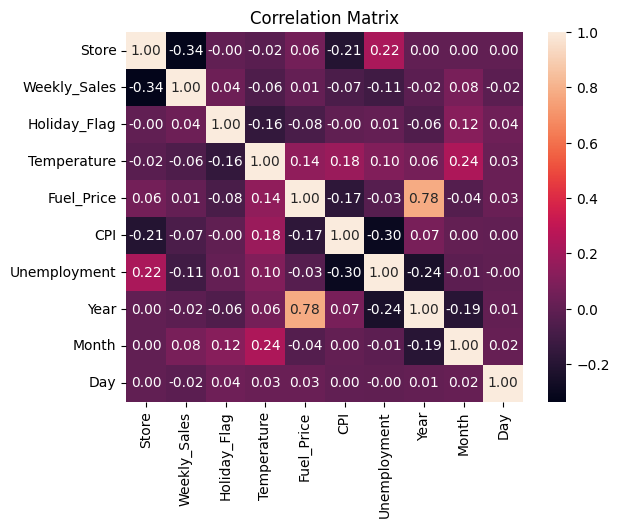

In [ ]:
correlation_matrix = df.select_dtypes(include=np.number).corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

ซึ่งจากค่า Correlation between attributes สามารถกล่าวได้อีกนัยว่า
* ค่าเป็นบวก: แสดงถึงความสัมพันธ์บวก หมายถึงเมื่อฟีเจอร์หนึ่งเพิ่มขึ้น อีกฟีเจอร์นึงก็มักจะเพิ่มขึ้นด้วย
* ค่าเป็นลบ: แสดงถึงความสัมพันธ์ลบ หมายถึงเมื่อฟีเจอร์หนึ่งเพิ่มขึ้น อีกฟีเจอร์นึงมักจะลดลง
* ค่าเป็นศูนย์: แสดงถึงไม่มีความสัมพันธ์


การเลียงลำดับลำดับของฟีเจอร์ที่มีความสัมพันธ์กับฟีเจอร์ "Weekly_Sales" โดยความสัมพันธ์นี้มีค่าสัมประสิทธิ์การสหสัมพันธ์สุงสุดที่สุดไปยังต่ำสุด โดยไม่สนใจทิศทางของความสัมพันธ์(ค่าบวก หรือ ค่าลบ)







In [ ]:
correlation_matrix['Weekly_Sales'].abs().sort_values(ascending=False)

,Weekly_Sales
Weekly_Sales,1.000000
Store,0.335332
Unemployment,0.106176
Month,0.076143
CPI,0.072634
Temperature,0.063810
Holiday_Flag,0.036891
Year,0.018378
Day,0.017409
Fuel_Price,0.009464


In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,5
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19


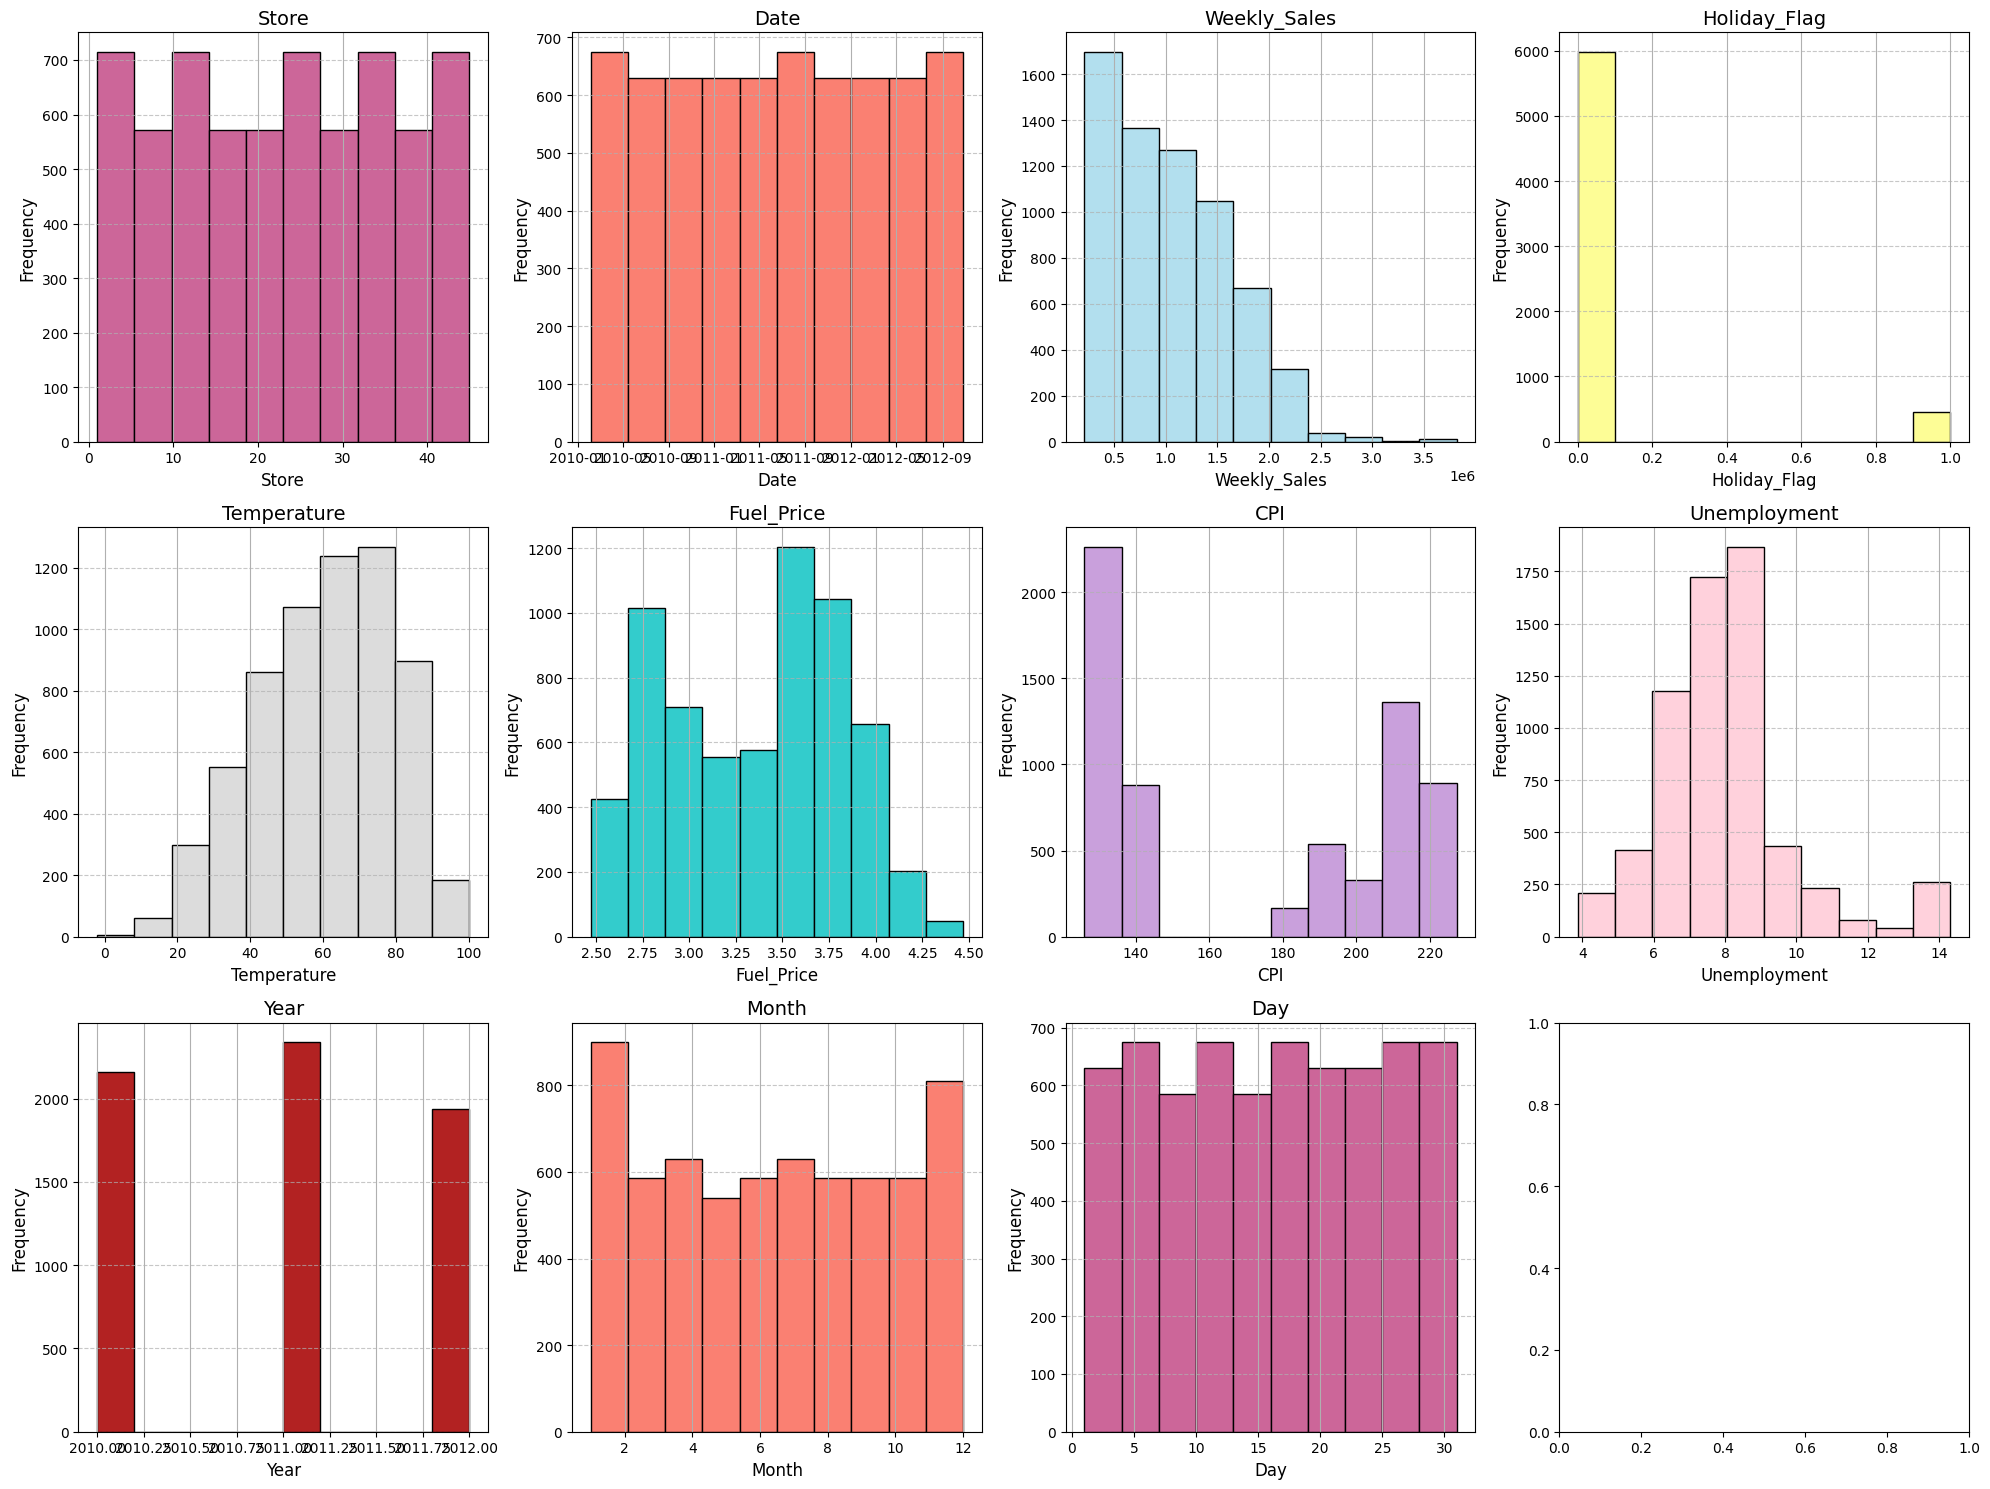

In [ ]:
colors = ['#CC6699', 'salmon', '#b2dfee', '#fdfd96',
          '#DCDCDC','#33CCCC','#c9a0dc','#ffd1dc',
          'Firebrick','salmon']  # Colors to cycle through

nrows = 3
ncols = (len(df.columns) + nrows - 1) // nrows

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))

for i, (col, ax) in enumerate(zip(df.columns, axs.flatten())):
    df[col].hist(ax=ax, color=colors[i % len(colors)], edgecolor='black')
    ax.set_title(col, fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### EDA 1 Relationship between  Features and Weekly Sale

**Assumptions 2** ข้อมูลต้องมาจากประชากรที่มีการแจกแจงแบบปกติ (Normal Distribution)
ตรวจสอบการแจกแจงของ ตัวแปรอิสระ และ ตัวแปรตาม ว่ามีการแจกแจงที่เป็นแบบปกติหรือไม่


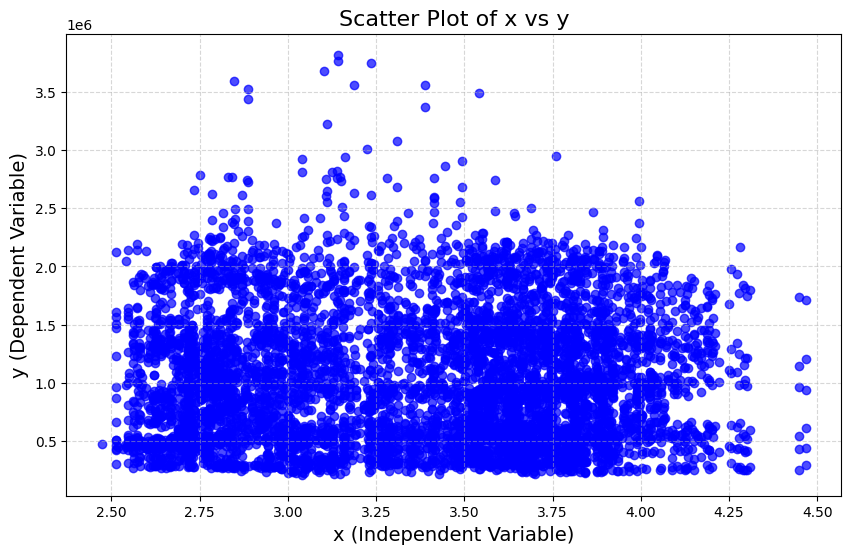

In [ ]:
x = data.drop(columns=['Weekly_Sales'])
y = data['Weekly_Sales']

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'x' has multiple columns (features)
# Select a single column for plotting against 'y'
x_for_plotting = x['Fuel_Price']  # Replace 'Fuel_Price' with the desired column name

# สร้าง Scatter Plot
plt.figure(figsize=(10, 6))  # กำหนดขนาดกราฟ
plt.scatter(x_for_plotting, y, color='blue', alpha=0.7)  # จุดข้อมูลในกราฟ
plt.title("Scatter Plot of x vs y", fontsize=16)  # ชื่อกราฟ
plt.xlabel("x (Independent Variable)", fontsize=14)  # ชื่อแกน X
plt.ylabel("y (Dependent Variable)", fontsize=14)  # ชื่อแกน Y
plt.grid(True, linestyle='--', alpha=0.5)  # เพิ่มเส้น Grid
plt.show()  # แสดงกราฟ

**การวิเคราะห์** จะเห็นว่าจุดข้อมูลกระจายตัวค่อนข้างสุ่ม ไม่ได้เรียงตัวเป็นเส้นตรงอย่างชัดเจน ซึ่งบ่งบอกว่า:

ความสัมพันธ์ไม่เป็นเชิงเส้น: ตัวแปร X และ Y อาจมีความสัมพันธ์กัน แต่ความสัมพันธ์นั้นไม่ใช่เชิงเส้นง่ายๆ

**Relationship between Features and Weekly Sale**
จากนั้น
ทำการวิเคราะห์ความสัมพันธ์ระหว่างตัวแปรตาม (Weekly Sales) กับตัวแปรเชิงตัวเลขอื่นๆ

โดยใช้ Scatter Plot แสดงความสัมพันธ์ระหว่าง Weekly Sales กับ

*   Temperature
*   Fuel Price
*   CPI (Consumer Price Index)
*   Unemployment Rate

เพื่อดูรูปแบบความสัมพันธ์และการกระจายตัวของข้อมูล

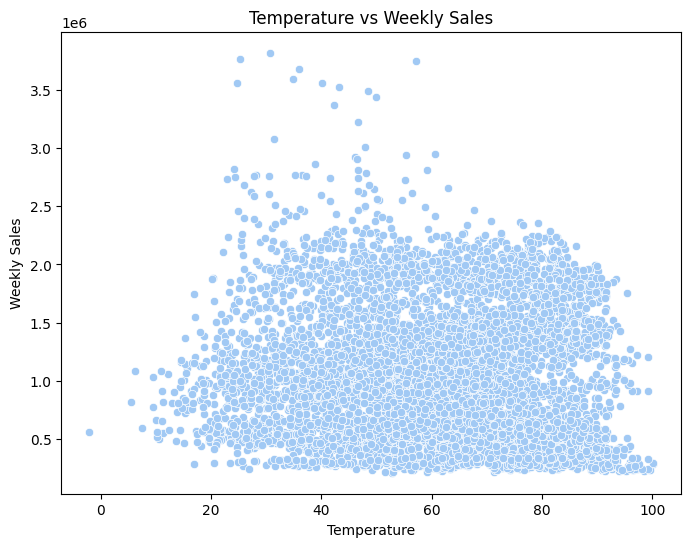

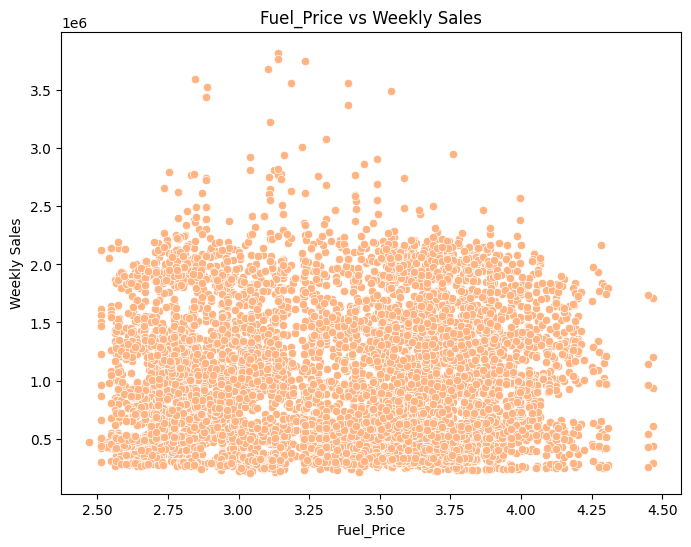

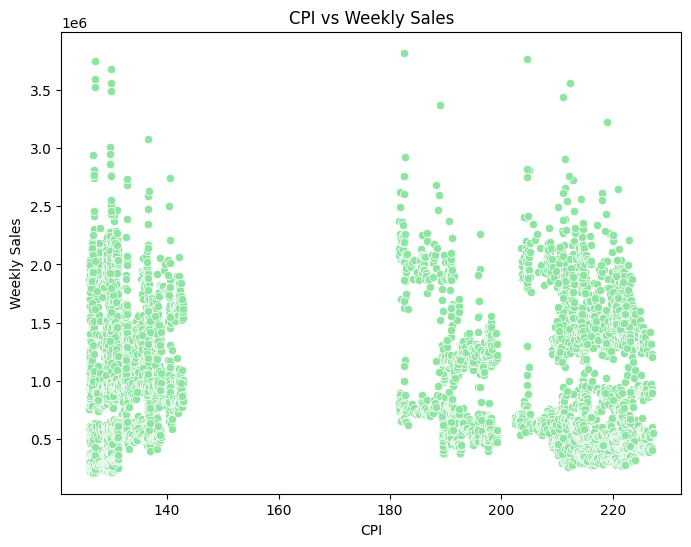

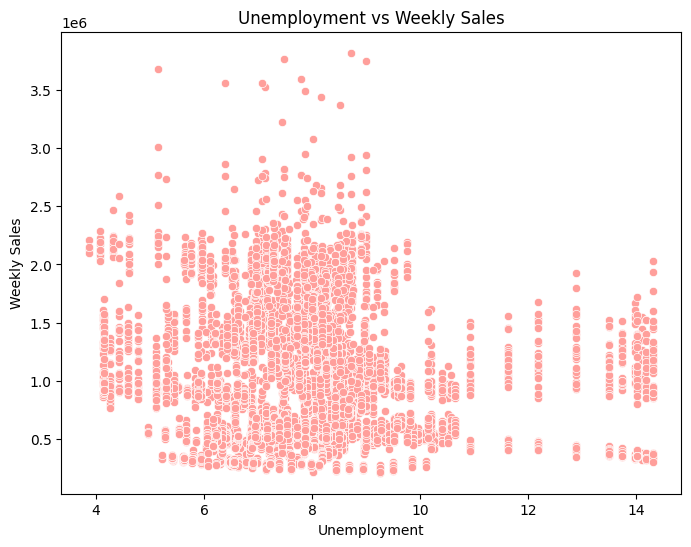

In [ ]:
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for i, feature in enumerate(numeric_features):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['Weekly_Sales'], color=sns.color_palette("pastel")[i])
    plt.title(f"{feature} vs Weekly Sales")
    plt.xlabel(feature)
    plt.ylabel('Weekly Sales')
    plt.show()


### สรุป EDA 1


*   Weekly Sales vs Temperature จะเห็นความสัมพันธ์ที่ ไม่เป็นเชิงเส้น จุดข้อมูลแสดงให้เห็นว่ายอดขายมีแนวโน้มสูงขึ้นเมื่ออุณหภูมิอยู่ในช่วงปานกลาง และลดลงเมื่ออุณหภูมิสูงหรือต่ำเกินไป
การกระจายตัวของจุดข้อมูลช่วยยืนยันว่าผู้บริโภคอาจมีพฤติกรรมการจับจ่ายที่แตกต่างกันตามสภาพอากาศ
*   Weekly Sales vs Fuel Price แสดงความสัมพันธ์ เชิงลบเล็กน้อย
จุดข้อมูลส่วนใหญ่กระจายตัวในแนวที่เมื่อราคาน้ำมันเพิ่มขึ้น ยอดขายมีแนวโน้มลดลงเล็กน้อย
การกระจายตัวที่กว้างบ่งบอกว่าปัจจัยนี้มีผลกระทบในระดับที่แตกต่างกันขึ้นอยู่กับพื้นที่หรือประเภทธุรกิจ

* Weekly Sales vs CPI (Consumer Price Index)แสดงให้เห็นความสัมพันธ์ที่ ไม่ชัดเจน ระหว่าง CPI และยอดขาย
จุดข้อมูลมีการกระจายตัวแบบสุ่ม โดยไม่มีแนวโน้มชัดเจนว่า CPI มีผลต่อยอดขาย
อาจสันนิษฐานได้ว่า CPI ไม่ใช่ตัวแปรหลักที่ส่งผลต่อยอดขายโดยตรง แต่ต้องพิจารณาร่วมกับปัจจัยอื่น

* Weekly Sales vs Unemployment Ratet แสดงความสัมพันธ์ เชิงลบอ่อนๆ ระหว่างอัตราการว่างงานและยอดขาย ยอดขายมีแนวโน้มลดลงเล็กน้อยเมื่ออัตราการว่างงานเพิ่มขึ้น ซึ่งสะท้อนถึงผลกระทบของรายได้ที่ลดลงต่อกำลังซื้อ
อย่างไรก็ตาม จุดข้อมูลยังคงกระจายตัวสูง แสดงว่าปัจจัยนี้มีผลกระทบที่แตกต่างกันตามบริบท


### EDA 2 Average Weekly Sales per Store by Year


การวิเคราะห์ยอดขายเฉลี่ยตามร้านค้าและปี
โดยใช้ Bar Chart เปรียบเทียบให้เห็นความแตกต่างระหว่างร้านค้าและการเปลี่ยนแปลงตามปี

*  แสดงค่าเฉลี่ยยอดขายรายสัปดาห์แยกตามร้านและปี (2010-2012)
*   แสดงยอดขายเฉลี่ยของแต่ละร้านในปี 2010 โดยเรียงจากยอดขายรวมต่ำไปสูง
*   แสดงยอดขายเฉลี่ยของแต่ละร้านในปี 2011 โดยเรียงจากยอดขายรวมต่ำไปสูง
*   แสดงยอดขายเฉลี่ยของแต่ละร้านในปี 2012 โดยเรียงจากยอดขายรวมต่ำไปสูง


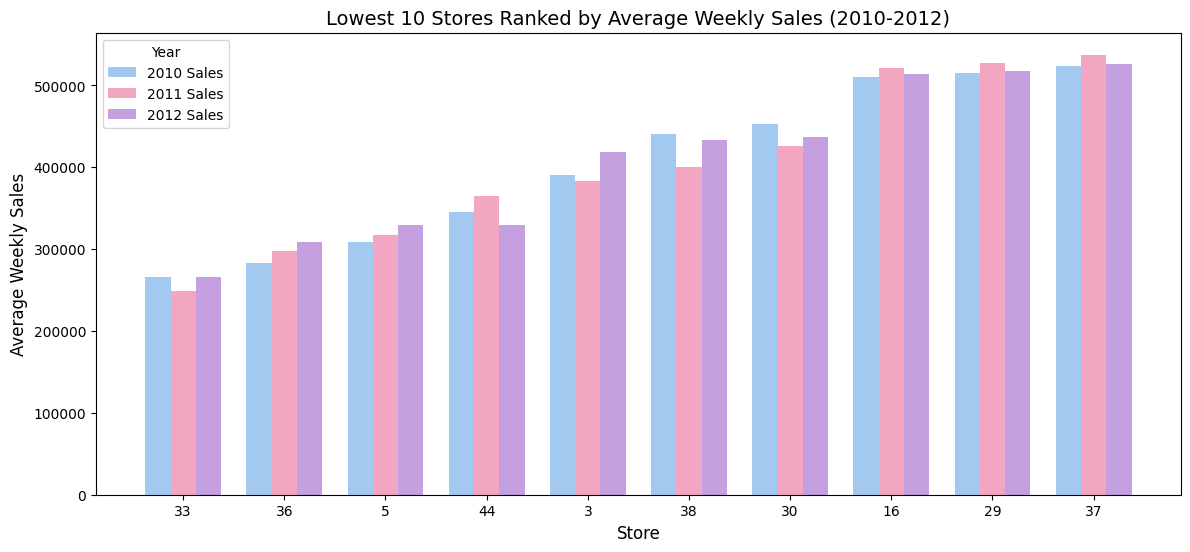

In [ ]:
pastel_colors = ['#a3c9f1', '#f2a6c2', '#c5a0e0']

plt.figure(figsize=(14, 6))
avg_sales_per_store_year = df.groupby(['Store', 'Year'])['Weekly_Sales'].mean().unstack()

bar_width = 0.25
x_positions = np.arange(10)

for idx, year in enumerate([2010, 2011, 2012]):
    avg_sales_year = avg_sales_per_store_year[year].sort_values()
    lowest_10_sales = avg_sales_year.head(10)

    # Sort values for each year separately before plotting:
    sorted_sales = lowest_10_sales.sort_values()

    plt.bar(x_positions + idx * bar_width, sorted_sales,
            width=bar_width, color=pastel_colors[idx], label=f'{year} Sales')

plt.title('Lowest 10 Stores Ranked by Average Weekly Sales (2010-2012)', fontsize=14)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Average Weekly Sales', fontsize=12)

# Update x-axis ticks to match the sorted order of the last year (2012):
plt.xticks(x_positions + bar_width, sorted_sales.index, rotation=0)

plt.legend(title='Year', loc='upper left')
plt.show()


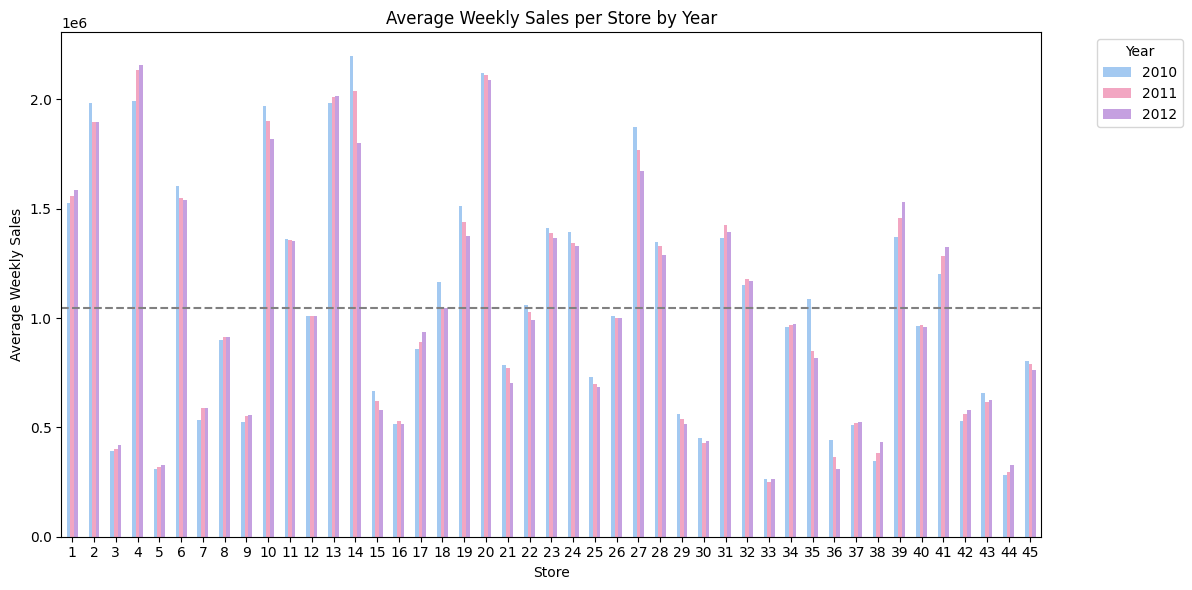

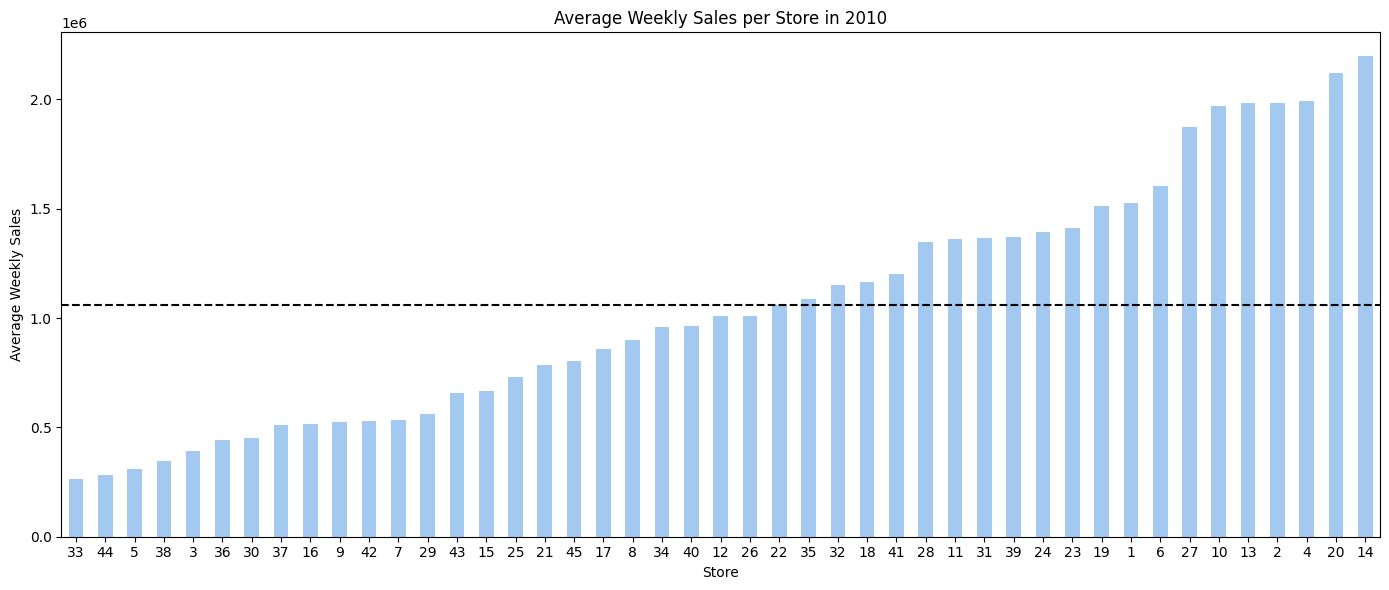

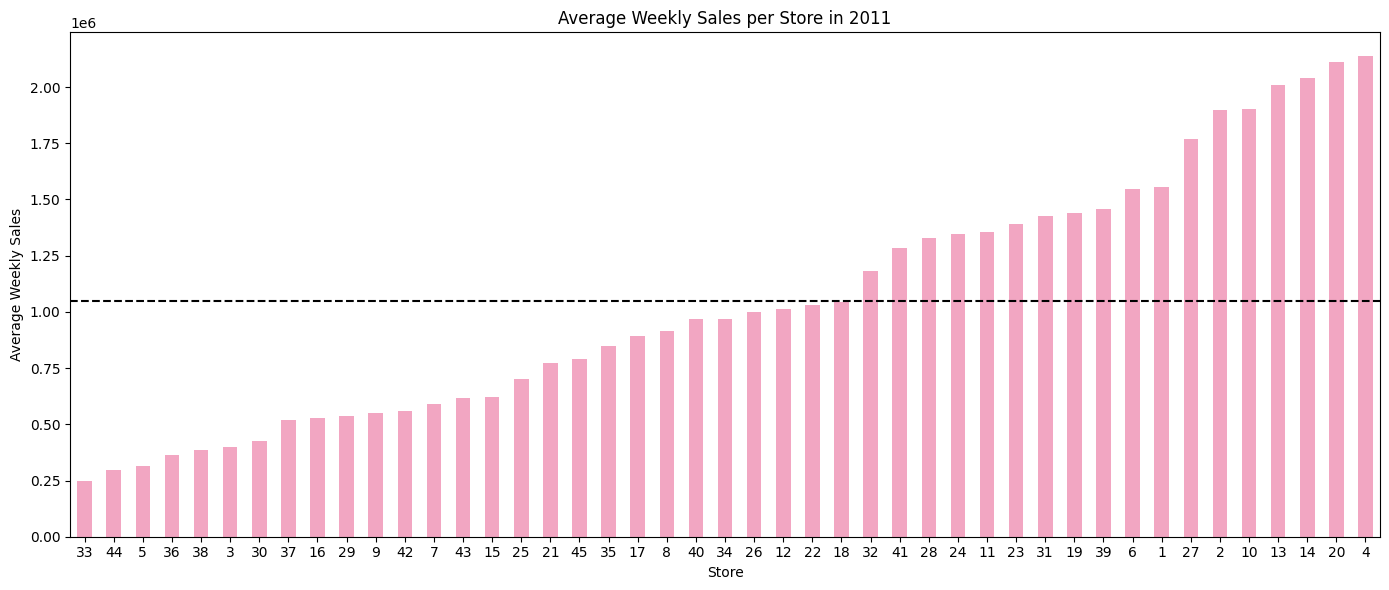

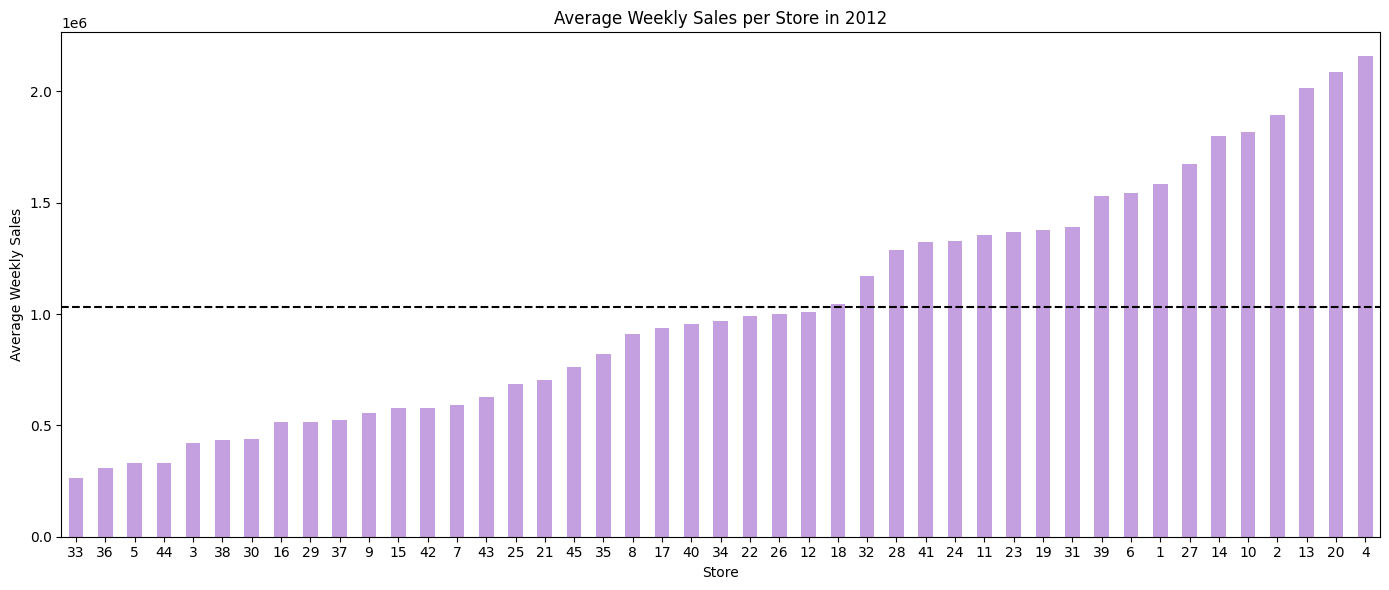

In [ ]:

# Plotting the average weekly sales per store by year
avg_sales_per_store_year = df.groupby(['Store', 'Year'])['Weekly_Sales'].mean().unstack()
pastel_colors = ['#a3c9f1', '#f2a6c2', '#c5a0e0']

# Bar plot for all years
avg_sales_per_store_year.plot(kind='bar', figsize=(12, 6), color=pastel_colors)
plt.title('Average Weekly Sales per Store by Year')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding a horizontal line for the average sales across all stores
overall_avg_sales = avg_sales_per_store_year.values.flatten().mean()
plt.axhline(overall_avg_sales, color='gray', linestyle='--', label='Overall Average')

plt.tight_layout()
plt.show()

# Plotting individual years with average lines
for year in [2010, 2011, 2012]:
    avg_sales_year = avg_sales_per_store_year[year].sort_values()
    avg_sales_year.plot(kind='bar', figsize=(14, 6), color=pastel_colors[year - 2010])
    plt.title(f'Average Weekly Sales per Store in {year}')
    plt.xlabel('Store')
    plt.ylabel('Average Weekly Sales')
    plt.xticks(rotation=0)

    # Adding a horizontal line for the average sales in that year
    year_avg_sales = avg_sales_year.mean()
    plt.axhline(year_avg_sales, color='black', linestyle='--', label=f'Average {year}')

    plt.tight_layout()
    plt.show()









### สรุป EDA 2

ยอดขายเฉลี่ยแตกต่างกันอย่างชัดเจนระหว่างสาขา ร้านบางร้านสามารถทำยอดขายเฉลี่ยได้สูงกว่าค่าเฉลี่ยของทุกสาขาอย่างมีนัยสำคัญ ขณะเดียวกันร้านบางร้านมียอดขายเฉลี่ยต่ำกว่าค่าเฉลี่ยมาก

การเปลี่ยนแปลงยอดขายระหว่างปี 2010-2012 เมื่อพิจารณาแนวโน้มยอดขายเฉลี่ยในแต่ละปี
*   ร้านบางแห่งมียอดขายเฉลี่ยเพิ่มขึ้นต่อเนื่อง ตลอดช่วงปี 2010-2012
*   ร้านบางร้านมียอดขายเฉลี่ยลดลง
*   ร้านบางร้านมียอดขายเฉลี่ยค่อนข้างคงที่


###EDA 3 Total Sales by Store and Year
การวิเคราะห์ยอดขายรวมตามร้านค้าและปี
โดยใช้ Bar Chart เปรียบเทียบให้เห็นความแตกต่างระหว่างร้านค้าและการเปลี่ยนแปลงตามปี
*  แสดงค่ารวมยอดขายรายสัปดาห์แยกตามร้านและปี(2010-2012)
*   แสดงยอดขายรวมของแต่ละร้านในปี 2010 โดยเรียงจากยอดขายรวมต่ำไปสูง
*   แสดงยอดขายรวมของแต่ละร้านในปี 2011 โดยเรียงจากยอดขายรวมต่ำไปสูง
*   แสดงยอดขายรวมของแต่ละร้านในปี 2012 โดยเรียงจากยอดขายรวมต่ำไปสูง



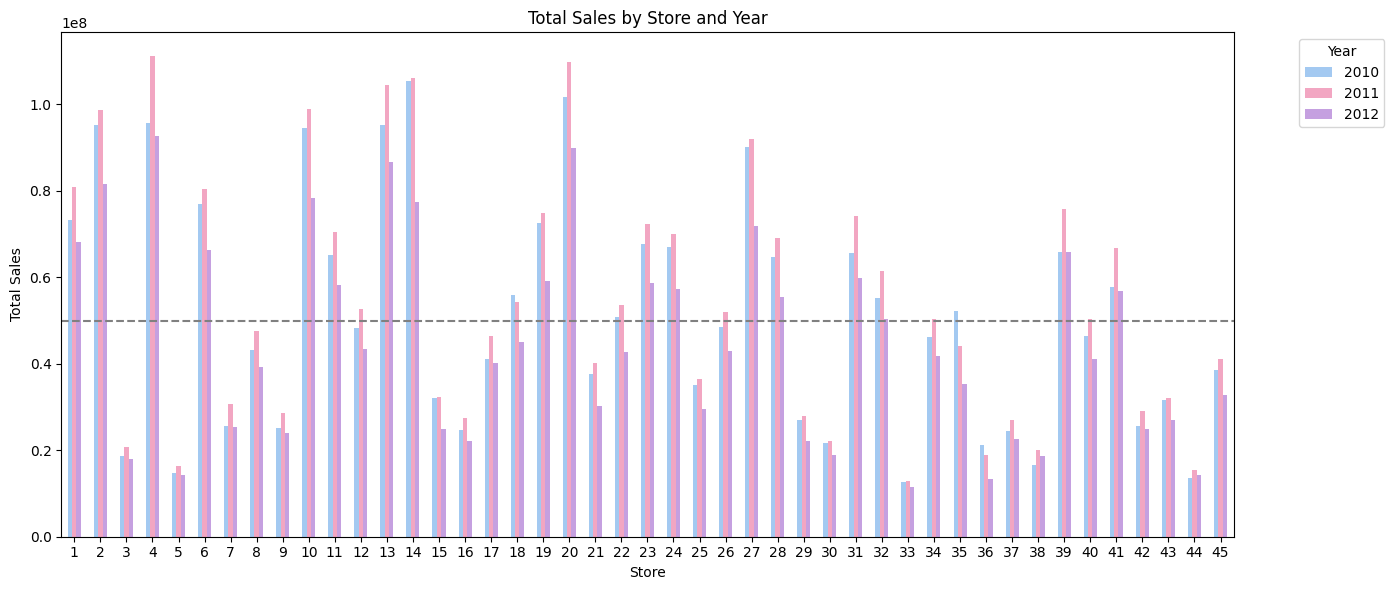

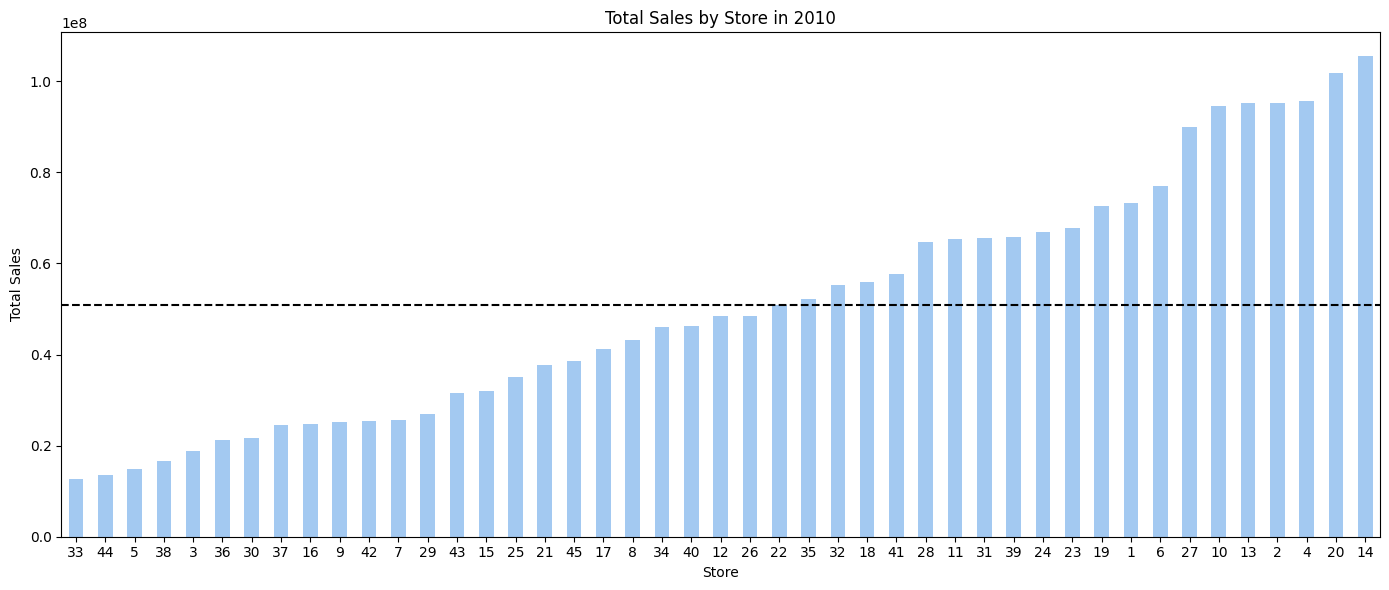

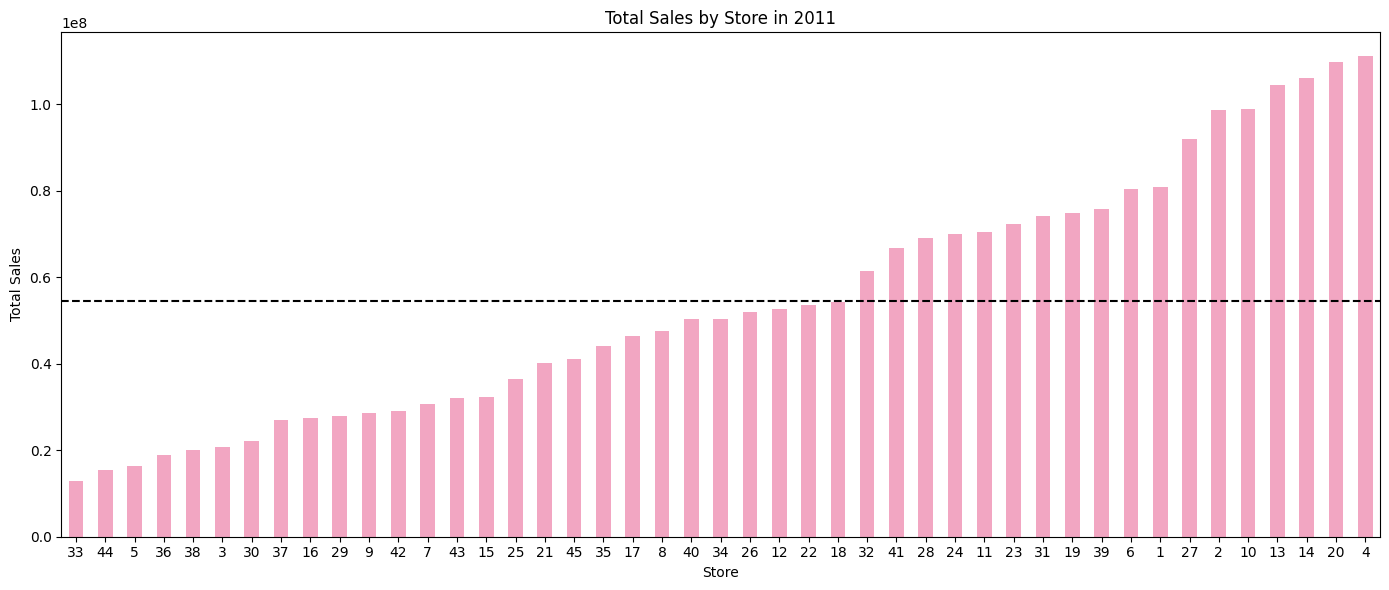

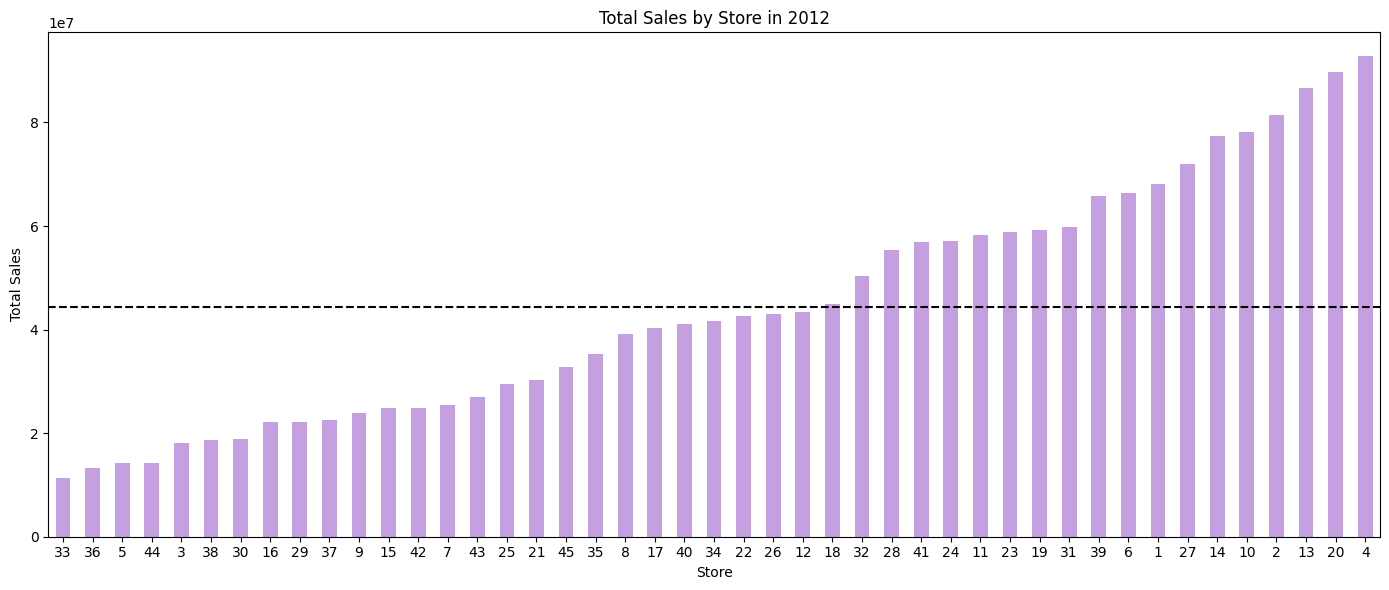

In [ ]:
# Plotting the total sales by store and year
store_sales_by_year = df.groupby(['Store', 'Year'])['Weekly_Sales'].sum().unstack()
pastel_colors = ['#a3c9f1', '#f2a6c2', '#c5a0e0']

# Bar plot for all years
store_sales_by_year.plot(kind='bar', figsize=(14, 6), color=pastel_colors)
plt.title('Total Sales by Store and Year')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding a horizontal line for the overall average total sales across all stores
overall_total_sales = store_sales_by_year.values.flatten().mean()
plt.axhline(overall_total_sales, color='gray', linestyle='--', label='Overall Average')

plt.tight_layout()
plt.show()

# Plotting individual years with average lines
for year in [2010, 2011, 2012]:
    store_sales_year = df[df['Year'] == year].groupby('Store')['Weekly_Sales'].sum()
    store_sales_year.sort_values().plot(kind='bar', figsize=(14, 6), color=pastel_colors[year - 2010])
    plt.title(f'Total Sales by Store in {year}')
    plt.xlabel('Store')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=0)

    # Adding a horizontal line for the average total sales in that year
    year_avg_sales = store_sales_year.mean()
    plt.axhline(year_avg_sales, color='black', linestyle='--', label=f'Average {year}')

    plt.tight_layout()
    plt.show()


### สรุป EDA 3

แต่ละร้านมียอดขายรวมที่แตกต่างกันอย่างชัดเจน
ร้านบางร้านสามารถทำยอดขายได้สูงกว่าค่าเฉลี่ยอย่างมีนัยสำคัญ
การเปลี่ยนแปลงยอดขายระหว่างปี 2010-2012
เมื่อพิจารณาแนวโน้มยอดขายรวมในแต่ละปี
*  ร้านบางแห่งมียอดขายรวมเพิ่มขึ้นต่อเนื่องตลอดช่วงปี 2010-2012
*  ร้านบางร้านมียอดขายรวมลดลง
*  ร้านบางร้านมียอดขายรวมค่อนข้างคงที่ในทุกปี

### EDA 4 Weekly Sales During Holidays vs Non-Holidays


การวิเคราะห์ผลกระทบของวันหยุด

*   โดยใช้ Box Plot เปรียบเทียบยอดขายระหว่างช่วงวันหยุดและวันธรรมดา
*   การทำ T-test เพื่อทดสอบว่ายอดขายในวันหยุดแตกต่างจากวันธรรมดาอย่างมีนัยสำคัญหรือไม่


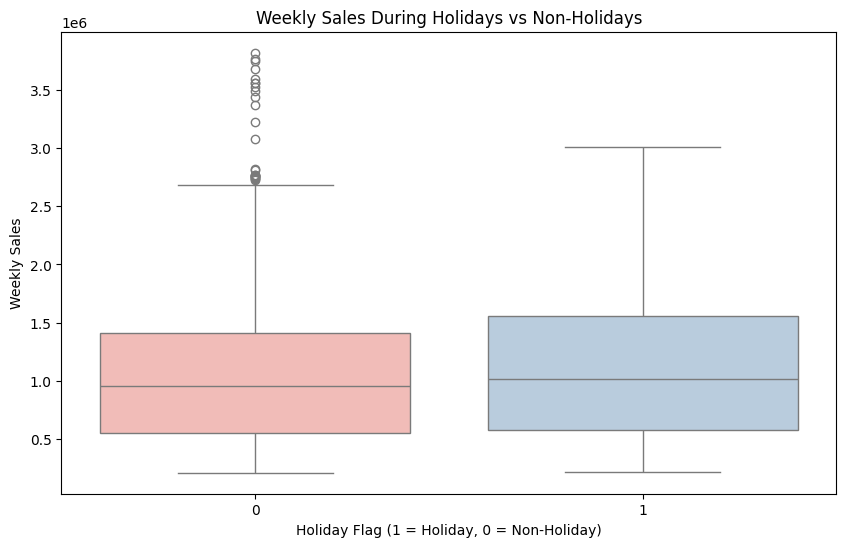

T-statistic: 2.9608919093259036
P-value: 0.003078699263818616


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df, hue='Holiday_Flag', palette='Pastel1', legend=False)
plt.title('Weekly Sales During Holidays vs Non-Holidays')
plt.xlabel('Holiday Flag (1 = Holiday, 0 = Non-Holiday)')
plt.ylabel('Weekly Sales')
plt.show()

holiday_sales_data = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday_sales_data = df[df['Holiday_Flag'] == 0]['Weekly_Sales']
t_stat, p_value = stats.ttest_ind(holiday_sales_data, non_holiday_sales_data)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

### สรุป EDA 4


จากกราฟ Box Plot แสดงให้เห็นว่ายอดขายในช่วงวันหยุด (Holiday Flag = 1) มีค่าเฉลี่ยสูงกว่าวันธรรมดา (Holiday Flag = 0)
มีการกระจายตัวของข้อมูลที่กว้างกว่าในวันหยุด แสดงถึงความผันผวนของยอดขายที่สูงกว่า
มี Outliers (ค่าผิดปกติ) ในทั้งสองกรณี แต่พบมากกว่าในวันธรรมดา

### EDA 5 Weekly Sales by year

การเปรียบเทียบ ยอดขายรายสัปดาห์รวม ในแต่ละ ฃปี โดยแสดงกราฟเส้นที่แสดงให้เห็นถึงการเปลี่ยนแปลงของยอดขายในแต่ละสัปดาห์ของแต่ละปี ซึ่งช่วยให้สามารถวิเคราะห์และดูแนวโน้มของยอดขายได้อย่างชัดเจนจากหลายปี

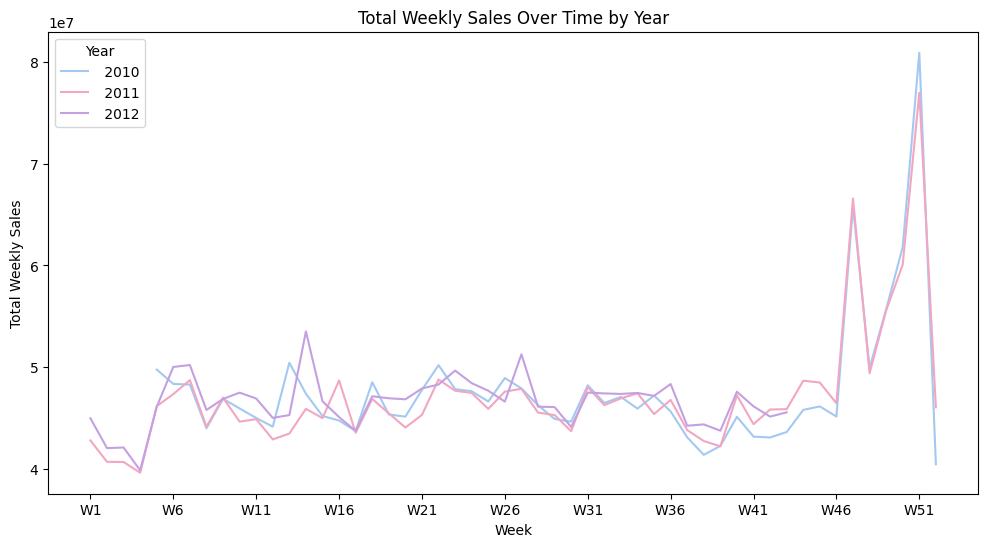

In [ ]:
weekly_sales_by_year = df.groupby([df['Date'].dt.year, df['Date'].dt.isocalendar().week])['Weekly_Sales'].sum()

plt.figure(figsize=(12, 6))

colors = ['#a3c9f1', '#f2a6c2', '#c5a0e0']

for idx, year in enumerate(weekly_sales_by_year.index.get_level_values(0).unique()):
    weekly_data = weekly_sales_by_year.loc[year]
    plt.plot(weekly_data.index, weekly_data.values, label=f' {int(year)}', color=colors[idx])

plt.xticks(range(1, 53, 5), [f'W{w}' for w in range(1, 53, 5)])

plt.title('Total Weekly Sales Over Time by Year')
plt.xlabel('Week')
plt.ylabel('Total Weekly Sales')
plt.legend(title="Year")
plt.show()


### สรุป EDA 5

:จากกราฟ ยอดขายรายสัปดาห์รวมตามช่วงเวลาโดยปี สามารถสรุปได้ว่า

* ยอดขายในแต่ละปีมีความแตกต่างกัน ทั้งในด้านการเพิ่มขึ้นหรือลดลงตามช่วงสัปดาห์
* มีแนวโน้มผันผวนตามฤดูกาล โดยยอดขายอาจสูงในช่วงเทศกาลหรือวันหยุด และต่ำในช่วงอื่นๆ
* การเปลี่ยนแปลงในแต่ละปี อาจสะท้อนถึงปัจจัยภายนอกหรือการเปลี่ยนแปลงของตลาด


## Model Building

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 0 to 6434
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            6435 non-null   datetime64[ns]
 1   Weekly_Sales    6435 non-null   float64       
 2   Temperature     6435 non-null   float64       
 3   Fuel_Price      6435 non-null   float64       
 4   CPI             6435 non-null   float64       
 5   Unemployment    6435 non-null   float64       
 6   Store_1         6435 non-null   float64       
 7   Store_2         6435 non-null   float64       
 8   Store_3         6435 non-null   float64       
 9   Store_4         6435 non-null   float64       
 10  Store_5         6435 non-null   float64       
 11  Store_6         6435 non-null   float64       
 12  Store_7         6435 non-null   float64       
 13  Store_8         6435 non-null   float64       
 14  Store_9         6435 non-null   float64       
 15  Store_10 

In [ ]:
data.sample(10)

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,Store_4,...,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_0,Holiday_Flag_1,Year,Month,Day,DayOfWeek
1454,2010-07-23,1244390.03,84.57,2.608,214.556497,7.346,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2010.0,7.0,23.0,4.0
7,2010-03-26,1404429.92,51.45,2.732,211.018042,8.106,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2010.0,3.0,26.0,4.0
3003,2010-02-05,1033017.37,24.36,2.788,135.352461,8.283,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2010.0,2.0,5.0,4.0
4218,2011-06-17,435481.03,87.54,3.637,214.651354,7.931,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2011.0,6.0,17.0,4.0
2749,2010-09-17,1948359.78,65.28,2.706,204.751328,7.527,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2010.0,9.0,17.0,4.0
1093,2011-11-11,917088.48,50.56,3.297,221.459513,6.123,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2011.0,11.0,11.0,4.0
5607,2010-09-03,976453.34,70.66,2.735,132.724839,5.326,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2010.0,9.0,3.0,4.0
3972,2012-03-23,1216059.41,56.26,4.038,130.896645,12.187,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2012.0,3.0,23.0,4.0
2039,2010-10-22,600395.73,47.10,3.049,132.817097,8.067,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2010.0,10.0,22.0,4.0
3259,2012-04-06,1604605.69,37.43,3.957,137.797097,4.125,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2012.0,4.0,6.0,4.0


**Assumptions3 ตัวแปรอิสระไม่ควรมีความสัมพันธ์กันมาก (Multicollinearity)**

ควรตรวจสอบว่าไม่มี Multicollinearity ระหว่างตัวแปรอิสระ โดยใช้ Variance Inflation Factor (VIF) หากค่า VIF สูงกว่าค่า 10 นั้นแสดงว่า ตัวแปรอิสระมีความสัมพันธ์กันสูงจนอาจทำให้โมเดลไม่เสถียร
สามารถใช้ Correlation Matrix เพื่อดูความสัมพันธ์ระหว่างตัวแปรอิสระ และตรวจสอบว่าตัวแปรใดที่มีความสัมพันธ์สูงเกินไป และอาจพิจารณาตัดออกหรือลดความสัมพันธ์โดยใช้เทคนิค Principal Component Analysis (PCA) หรือ Feature Selection


ชุดที่ 1 คือชุดที่มีตัวแปร Date อยู่ในโมเดล (ยังไม่ลบ Date)

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# เลือกคอลัมน์ที่ไม่ใช่ target variable และเพิ่ม constant เพื่อคำนวณ VIF
# เปลี่ยน 'target_column' เป็นชื่อคอลัมน์ target variable จริงใน DataFrame ของคุณ
X = data.drop('Weekly_Sales', axis=1)  # เปลี่ยน 'Weekly_Sales' เป็นชื่อคอลัมน์ที่ถูกต้อง
# Convert all columns in X to numeric type, errors='coerce' will replace non-numeric values with NaN
X = X.apply(pd.to_numeric, errors='coerce')
X = add_constant(X)  # เพิ่ม constant column สำหรับการคำนวณ

# คำนวณ VIF สำหรับแต่ละตัวแปร
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# แสดงผลลัพธ์
print(vif_data)

          Variable            VIF
0             Date  345098.179889
1      Temperature       1.014518
2       Fuel_Price       1.243929
3              CPI       1.005952
4     Unemployment       0.955127
5          Store_1       0.999992
6          Store_2       0.999992
7          Store_3       0.999992
8          Store_4       0.999992
9          Store_5       0.999992
10         Store_6       0.999992
11         Store_7       0.999992
12         Store_8       0.999992
13         Store_9       0.999992
14        Store_10       0.999992
15        Store_11       0.999992
16        Store_12       0.999992
17        Store_13       0.999992
18        Store_14       0.999992
19        Store_15       0.999992
20        Store_16       0.999992
21        Store_17       0.999992
22        Store_18       0.999992
23        Store_19       0.999992
24        Store_20       0.999992
25        Store_21       0.999992
26        Store_22       0.999992
27        Store_23       0.999992
28        Stor

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


**ชุดที่ 1**
* ตัวแปร Date มีค่า VIF สูงมาก (345,098.18) บ่งบอกถึง multicollinearity ที่รุนแรง ระหว่าง Date กับตัวแปรอื่น
ตัวแปร Store_1 ถึง Store_45 มีค่า VIF ต่ำ (0.999992) แต่ DayOfWeek มีค่า VIF เป็น 0 ซึ่งไม่สมเหตุสมผล (ตัวแปรนี้น่าจะเป็น constant หรือ redundant ในโมเดล)
* ตัวแปร Holiday_Flag_0 และ Holiday_Flag_1 มีค่า VIF ต่ำ (< 1) ซึ่งปกติบ่งบอกถึงตัวแปรที่ไม่ได้มี multicollinearity สูง แต่ค่าเหล่านี้อาจไม่สะท้อนความสัมพันธ์ที่แท้จริงหากข้อมูลมีปัญหา
* ตัวแปร Year มีค่า VIF ต่ำผิดปกติ (0.000449) ซึ่งอาจเป็นเพราะการแบ่งตัวแปรในรูปแบบที่ทำให้เกิดปัญหา scaling

ปัญหา:
* ตัวแปร Date มีค่า VIF สูงเกินกว่าจะใช้ในโมเดลได้
* ตัวแปร DayOfWeek มีค่า VIF เป็น 0 ซึ่งบ่งบอกถึงปัญหาในข้อมูล
โมเดลอาจจะเกิดการ overfit หากตัวแปรที่ไม่เกี่ยวข้องถูกบังคับรวมในโมเดล


จากขั้นตอนที่ผ่านมา สามารถแยกโมเดลได้เป็นสองอย่าง
* ข้อมูลเชิงเส้น: Multiple Linear Regression, Lasso Regression
* ข้อมูลไม่เชิงเส้น: Polynomial Regression, Random Forest

**เมื่อไหร่ควรใช้โมเดลใด**

1. Multiple Linear Regression: ใช้เมื่อความสัมพันธ์ระหว่างตัวแปรตามและตัวแปรอิสระเป็นเชิงเส้น และไม่มีปัญหา outliers หรือ multicollinearity
2. Lasso Regression: ใช้เมื่อมี feature จำนวนมากและต้องการเลือก feature ที่สำคัญที่สุด เหมาะสำหรับป้องกันการ overfitting
3. Polynomial Regression: ใช้เมื่อความสัมพันธ์ระหว่างตัวแปรไม่เป็นเชิงเส้นและสามารถประมาณได้ด้วยฟังก์ชันพหุนาม แต่ระวังปัญหา overfitting
4. Random Forest: ใช้เมื่อข้อมูลมีความซับซ้อน มีความสัมพันธ์ที่ไม่เป็นเชิงเส้น และมีปฏิสัมพันธ์ระหว่าง feature เป็นโมเดลที่ทรงพลังและมีความยืดหยุ่น

In [ ]:
x = data.drop(columns=['Weekly_Sales','Date'])
y = data['Weekly_Sales']

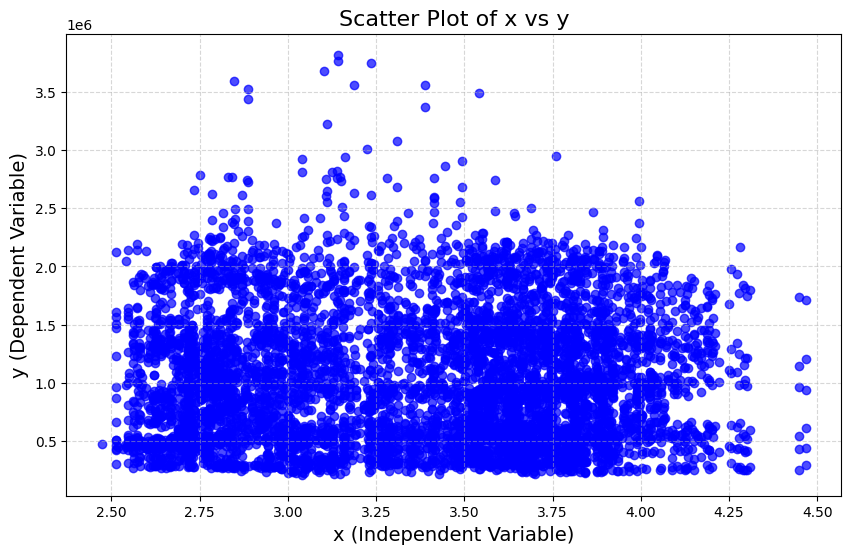

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'x' has multiple columns (features)
# Select a single column for plotting against 'y'
x_for_plotting = x['Fuel_Price']  # Replace 'Fuel_Price' with the desired column name

# สร้าง Scatter Plot
plt.figure(figsize=(10, 6))  # กำหนดขนาดกราฟ
plt.scatter(x_for_plotting, y, color='blue', alpha=0.7)  # จุดข้อมูลในกราฟ
plt.title("Scatter Plot of x vs y", fontsize=16)  # ชื่อกราฟ
plt.xlabel("x (Independent Variable)", fontsize=14)  # ชื่อแกน X
plt.ylabel("y (Dependent Variable)", fontsize=14)  # ชื่อแกน Y
plt.grid(True, linestyle='--', alpha=0.5)  # เพิ่มเส้น Grid
plt.show()  # แสดงกราฟ

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(f" X_train: {x_train.shape}")
print(f" y_train: {y_train.shape}")
print(f" X_test: {x_test.shape}")
print(f" y_test: {y_test.shape}")

 X_train: (5148, 55)
 y_train: (5148,)
 X_test: (1287, 55)
 y_test: (1287,)


### Multiple Linear Regression

1. Linear Regression
* คำอธิบาย: โมเดลนี้เป็นการถดถอยเชิงเส้นที่ใช้สำหรับการทำนายค่าของตัวแปรตาม (y) โดยใช้ตัวแปรอิสระ (X) หนึ่งหรือหลายตัว โมเดลจะพยายามหาค่าพารามิเตอร์ (เช่น ค่าตัดแกนและสัมประสิทธิ์) ที่ทำให้สมการเหมาะสมที่สุดในการทำนาย

 **สมการ**

         y = β0 + β1(x1) + β2(x2) +...+  βn(xn)

* โดยที่:

      β0         คือ ค่าตัดแกน (intercept)
      β1,β2,…,βn คือ สัมประสิทธิ์ที่แสดงความสัมพันธ์กับตัวแปรอิสระ
      x1,x2,…,xn คือ ตัวแปรอิสระที่ใช้ในการทำนาย

* **การใช้งาน**  
การใช้ Linear Regression สามารถคาดการณ์ค่า y ได้จากค่าของตัวแปรอิสระ
โดยสมการที่ได้จะช่วยให้เราทราบถึงความสัมพันธ์ระหว่างตัวแปรต่างๆ

* **ผลลัพธ์:**

     R² สูงแสดงว่าโมเดลมีความแม่นยำในการอธิบายข้อมูล

     RMSE ใช้ในการประเมินค่าผิดพลาดเฉลี่ยระหว่างค่าที่ทำนายกับค่าจริง


Importing Libraries:

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Split the Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# แสดงผล
print(f"x_train:, {x_train.shape}")
print(f"y_train:, {y_train.shape}")
print(f"x_test:, {x_test.shape}")
print(f"y_test:, {y_test.shape}")

x_train:, (5148, 55)
y_train:, (5148,)
x_test:, (1287, 55)
y_test:, (1287,)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 0 to 6434
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            6435 non-null   datetime64[ns]
 1   Weekly_Sales    6435 non-null   float64       
 2   Temperature     6435 non-null   float64       
 3   Fuel_Price      6435 non-null   float64       
 4   CPI             6435 non-null   float64       
 5   Unemployment    6435 non-null   float64       
 6   Store_1         6435 non-null   float64       
 7   Store_2         6435 non-null   float64       
 8   Store_3         6435 non-null   float64       
 9   Store_4         6435 non-null   float64       
 10  Store_5         6435 non-null   float64       
 11  Store_6         6435 non-null   float64       
 12  Store_7         6435 non-null   float64       
 13  Store_8         6435 non-null   float64       
 14  Store_9         6435 non-null   float64       
 15  Store_10 

Create and Train the Model

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

Get Model Parameters

In [ ]:
lr_coefficients = lr_model.coef_
lr_intercept = lr_model.intercept_

Make Predictions

In [ ]:
y_pred = lr_model.predict(x_test)

Evaluate the Model

In [ ]:
lr_rss = np.sum((y_test - y_pred)**2)
lr_mse = mean_squared_error(y_test, y_pred)

# คำนวณ Root Mean Squared Error (RMSE)
rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, y_pred)

Print the Results

In [ ]:
print(f"Coefficients (β): {lr_coefficients}")
print(f"Intercept: {lr_intercept}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {lr_r2}")

Coefficients (β): [-1.91379755e+03  1.93171667e+04  9.01872245e+03 -3.48887335e+04
  4.36174745e+14  4.36174746e+14  4.36174744e+14  4.36174746e+14
  4.36174744e+14  4.36174745e+14  4.36174744e+14  4.36174744e+14
  4.36174744e+14  4.36174746e+14  4.36174745e+14  4.36174746e+14
  4.36174746e+14  4.36174746e+14  4.36174745e+14  4.36174744e+14
  4.36174745e+14  4.36174745e+14  4.36174746e+14  4.36174746e+14
  4.36174744e+14  4.36174745e+14  4.36174746e+14  4.36174746e+14
  4.36174744e+14  4.36174745e+14  4.36174746e+14  4.36174746e+14
  4.36174745e+14  4.36174744e+14  4.36174745e+14  4.36174745e+14
  4.36174745e+14  4.36174745e+14  4.36174745e+14  4.36174744e+14
  4.36174744e+14  4.36174745e+14  4.36174745e+14  4.36174745e+14
  4.36174745e+14  4.36174745e+14  4.36174744e+14  4.36174745e+14
  4.36174745e+14 -8.15725105e+14 -8.15725105e+14 -6.24432227e+04
  1.24260000e+04 -1.21073438e+03  0.00000000e+00]
Intercept: 379550485225043.75
Root Mean Squared Error (RMSE): 154900.49515135319
R-squa

#### Visualizing Multiple Linear Regression

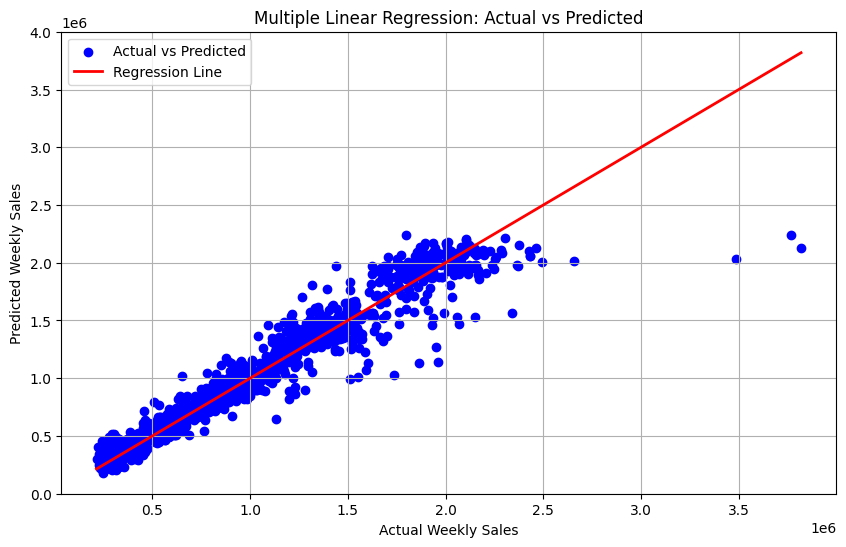

In [ ]:
# Visualization (สำหรับ x และ y)
plt.figure(figsize=(10, 6))
plt.scatter(x=y_test, y=y_pred, color='blue', label='Actual vs Predicted')  # พล็อตค่าจริงเทียบกับค่าพยากรณ์
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Regression Line')  # เส้นแนวโน้ม
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.legend()
plt.grid()
plt.show()

**กราฟที่ได้**

จากกราฟที่คุณแสดงมา กราฟนี้เรียกว่า กราฟการกระจาย (scatter plot) ที่มี เส้นการถดถอยเชิงเส้น วาดทับอยู่
* ซึ่งใช้เพื่อแสดงความสัมพันธ์ระหว่างค่าที่เราทำนาย (y_pred) กับค่าจริง (y_test)

* จุดแต่ละจุด : แทนข้อมูลหนึ่งคู่ โดยแกน X คือค่าที่โมเดลทำนาย และแกน Y คือค่าจริง
* เส้นตรง : คือ เส้นการถดถอยเชิงเส้น ที่แสดงแนวโน้มโดยรวมของความสัมพันธ์ระหว่างค่าทั้งสอง
* พื้นที่สีฟ้า : แสดงช่วงความเชื่อมั่น 95% หมายความว่า เราค่อนข้างมั่นใจ 95% ว่าเส้นตรงที่แท้จริงจะอยู่ภายในช่วงนี้

**ความหมายของกราฟ**

* ความสัมพันธ์เชิงบวก: จากกราฟที่จุดข้อมูลส่วนใหญ่กระจายตัวไปในทิศทางเดียวกัน แสดงว่าเมื่อค่าที่โมเดลทำนายสูงขึ้น ค่าจริงก็มีแนวโน้มที่จะสูงขึ้นตามไปด้วย ซึ่งบ่งบอกถึงความสัมพันธ์เชิงบวก
* ความใกล้เคียงของจุดข้อมูลกับเส้นตรง: หากจุดข้อมูลส่วนใหญ่กระจุกตัวอยู่ใกล้เส้นตรง แสดงว่าโมเดลสามารถทำนายค่าได้ค่อนข้างแม่นยำ แต่ถ้าจุดข้อมูลกระจายตัวห่างจากเส้นตรงมาก แสดงว่าโมเดลอาจไม่เหมาะสมหรือมีปัจจัยอื่นๆ ที่ส่งผลต่อผลลัพธ์
* ช่วงความเชื่อมั่น: ช่วงความเชื่อมั่นที่แคบ แสดงว่าเราสามารถมั่นใจได้มากขึ้นว่าเส้นตรงที่แท้จริงจะอยู่ใกล้กับเส้นตรงที่เราได้วาด

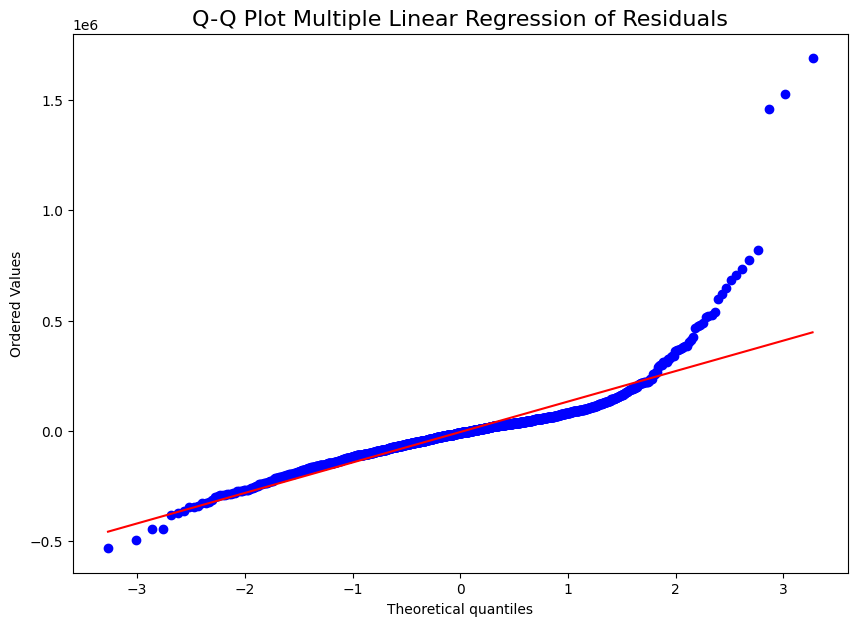

In [ ]:
import scipy.stats as stats
import numpy as np

# คำนวณ residuals
residuals = y_test - y_pred

# Q-Q Plot
plt.figure(figsize=(10, 7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot Multiple Linear Regression of Residuals", fontsize=16)
plt.show()


**Q-Q Plot (Quantile-Quantile Plot)** เป็นกราฟที่ใช้เปรียบเทียบการแจกแจงของข้อมูลจริงกับการแจกแจงทางทฤษฎี (โดยทั่วไปคือการแจกแจงปกติ) ในกรณีนี้ เราใช้ Q-Q Plot เพื่อตรวจสอบว่า Residuals หรือ ค่าความคลาดเคลื่อน จากการทำนายของแบบจำลองการถดถอยเชิงเส้นพหุคูณ มีการแจกแจงเป็นปกติหรือไม่

**การตีความภาพ**

* จุดสีน้ำเงิน: แต่ละจุดแทนค่าของ Residuals ที่เรียงลำดับจากน้อยไปมาก
* เส้นสีแดง: เส้นตรงที่แสดงถึงการแจกแจงปกติที่เราคาดหวัง
* หากจุดส่วนใหญ่เรียงตัวอยู่บนเส้นตรง แสดงว่า Residuals มีการแจกแจงใกล้เคียงกับการแจกแจงปกติ ซึ่งเป็นสมมติฐานสำคัญในการวิเคราะห์การถดถอย
* หากจุดเบี่ยงเบนออกจากเส้นตรง แสดงว่า Residuals อาจไม่ได้มีการแจกแจงเป็นปกติ ซึ่งอาจส่งผลต่อความน่าเชื่อถือของผลการวิเคราะห์

**ความหมายของ Q-Q Plot**
การตรวจสอบสมมติฐาน: Q-Q Plot ช่วยให้เราตรวจสอบสมมติฐานที่ว่า Residuals มีการแจกแจงเป็นปกติ ซึ่งเป็นสมมติฐานพื้นฐานในการวิเคราะห์การถดถอย
การประเมินความเหมาะสมของแบบจำลอง: หาก Residuals ไม่ได้มีการแจกแจงเป็นปกติ อาจบ่งชี้ว่าแบบจำลองที่เราสร้างขึ้น**อาจไม่เหมาะสมกับข้อมูล**

**สิ่งที่สังเกตใน Q-Q Plot**
* หางของการแจกแจง: สังเกตว่าจุดที่อยู่บริเวณหางของการแจกแจง (ทั้งซ้ายและขวา) เบี่ยงเบนออกจากเส้นตรงมากน้อยเพียงใด หากเบี่ยงเบนมาก อาจบ่งชี้ว่ามีค่าผิดปกติ (Outlier) หรือมีการแจกแจงที่ไม่สมมาตร
* ส่วนกลางของการแจกแจง: สังเกตว่าจุดส่วนใหญ่ในบริเวณกลางของการแจกแจงเรียงตัวอยู่ใกล้เส้นตรงหรือไม่ หากจุดส่วนใหญ่ไม่เรียงตัวอยู่ใกล้เส้นตรง อาจบ่งชี้ว่าการแจกแจงของ Residuals แตกต่างจากการแจกแจงปกติอย่างมีนัยสำคัญ



---



### Lasso Regression

2. Lasso Regression
* คำอธิบาย: Lasso Regression (Least Absolute Shrinkage and Selection Operator) เป็นวิธีการถดถอยเชิงเส้นที่เหมือนกับ Linear Regression แต่จะมีการใช้การหักลด (regularization) **เพื่อควบคุมค่า β ให้มีค่าต่ำหรือเป็นศูนย์บางตัว**  ซึ่งช่วยในเรื่องของการเลือกคุณสมบัติ (feature selection) และป้องกัน overfitting โดยจะใช้การหักลด (L1 regularization)

* **คุณสมบัติ:**

  L1 regularization: การหักลดนี้จะทำให้บางค่าสัมประสิทธิ์ (β) เป็นศูนย์ ซึ่งเป็นการเลือกเฉพาะคุณสมบัติที่สำคัญจริงๆ
  ช่วยป้องกัน overfitting ในกรณีที่ข้อมูลมีจำนวนคุณสมบัติมากเกินไป

* **ผลลัพธ์:**

  ค่าของ R² และ RMSE สำหรับโมเดลนี้อาจคล้ายกับ Linear Regression แต่สามารถลดความซับซ้อนและเลือกคุณสมบัติที่สำคัญกว่า

Importing Libraries:

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Split the Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# แสดงผล
print(f"x_train:, {x_train.shape}")
print(f"y_train:, {y_train.shape}")
print(f"x_test:, {x_test.shape}")
print(f"y_test:, {y_test.shape}")

x_train:, (5148, 55)
y_train:, (5148,)
x_test:, (1287, 55)
y_test:, (1287,)


#### Hyperparameter tuning

ใช้ LassoCV เพื่อหา alpha ที่เหมาะสม

**ตรวจสอบผลลัพธ์**
* หาก alpha ต่ำเกินไป โมเดลอาจจะ overfit (ใช้ตัวแปรมากเกินจำเป็น)
* หาก alpha สูงเกินไป โมเดลอาจจะ underfit (ตัดตัวแปรสำคัญทิ้งมากเกินไป)

In [ ]:
from sklearn.linear_model import LassoCV

# ใช้ LassoCV เพื่อหา alpha ที่เหมาะสม
ls_cv_model = LassoCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)
ls_cv_model.fit(x_train, y_train)

# แสดง alpha ที่ดีที่สุด
print(f"Best alpha: {ls_cv_model.alpha_}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47514677494984.266, tolerance: 131523352296.64708
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46858661671089.82, tolerance: 131523352296.64708
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46788030923039.06, tolerance: 131523352296.64708
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: Convergenc

Best alpha: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.913e+13, tolerance: 1.635e+11
  model = cd_fast.enet_coordinate_descent(


Create and Train the Model

In [ ]:
ls_model = Lasso(alpha=0.1)  # ค่า alpha = 0.1
ls_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.914e+13, tolerance: 1.635e+11
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

Get Model Parameters

In [ ]:
ls_coefficients = ls_model.coef_
ls_intercept = ls_model.intercept_

Make Predictions

In [ ]:
y_pred = ls_model.predict(x_test)

Evaluate the Model

In [ ]:
ls_rss = np.sum((y_test - y_pred)**2)
ls_mse = mean_squared_error(y_test, y_pred)
# คำนวณ Root Mean Squared Error (RMSE)
rmse = np.sqrt(ls_mse)

ls_r2 = r2_score(y_test, y_pred)

Print the Results

In [ ]:
print(f"Coefficients (β): {ls_coefficients}")
print(f"Intercept: {ls_intercept}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {ls_r2}")

Coefficients (β): [-1.90404415e+03  1.75474041e+04  5.22327670e+03 -3.29363917e+04
  3.66588637e+05  7.33193609e+05 -8.11613417e+05  1.29924098e+06
 -9.23959157e+05  3.44082163e+05 -5.32578601e+05 -3.65958815e+05
 -7.23016229e+05  1.18733412e+06  1.42448104e+05  4.49330198e+05
  1.22392758e+06  9.74180644e+05 -1.69696753e+05 -6.39005377e+05
  7.53233803e+04  3.29725552e+05  6.48321785e+05  9.20745054e+05
 -4.29213309e+05  2.14374786e+05  4.88381338e+05  5.74226432e+05
 -4.92839679e+05  1.95318738e+05  9.89488588e+05  7.68433474e+05
 -1.92009046e+05 -7.57400755e+05  1.97711873e+05  8.22540428e+04
 -4.41353381e+05  2.83236937e+05  1.31610195e+05 -7.97565327e+05
 -6.53554231e+05 -1.76513154e+05  2.71420197e+05  5.45511256e+04
  1.34330116e+05 -1.54875187e+05 -4.38500300e+05 -4.91424903e+05
 -2.46649980e+05 -4.19156123e+04  0.00000000e+00 -4.56869531e+04
  1.34584935e+04 -1.17856040e+03  0.00000000e+00]
Intercept: 92236508.174708
Root Mean Squared Error (RMSE): 154756.5579847176
R-squared 

#### Visualizing Lasso Regression

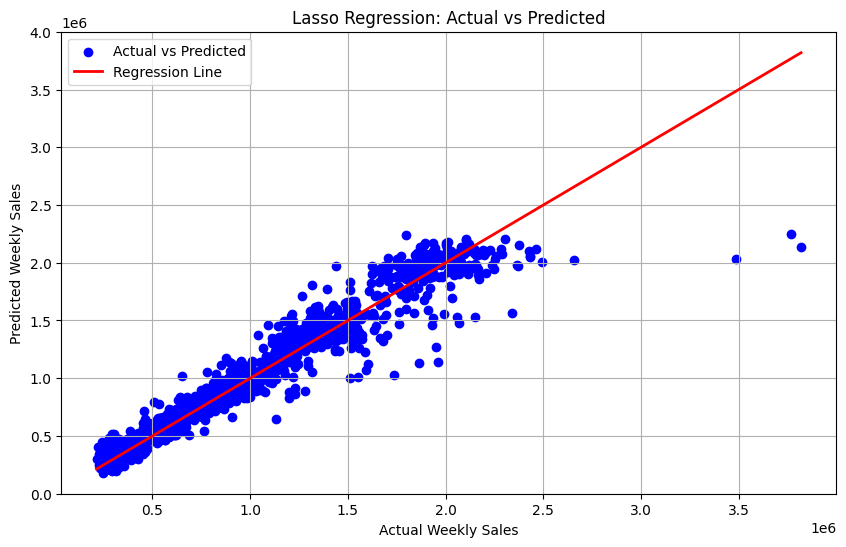

In [ ]:
# Visualization (สำหรับ x และ y)
plt.figure(figsize=(10, 6))
plt.scatter(x=y_test, y=y_pred, color='blue', label='Actual vs Predicted')  # พล็อตค่าจริงเทียบกับค่าพยากรณ์
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Regression Line')  # เส้นแนวโน้ม
plt.title("Lasso Regression: Actual vs Predicted")
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.legend()
plt.grid()
plt.show()

**กราฟที่ได้**

จากกราฟที่คุณแสดงมา กราฟนี้เรียกว่า กราฟการกระจาย (scatter plot) ที่มี เส้นการถดถอยเชิงเส้น วาดทับอยู่
* ซึ่งใช้เพื่อแสดงความสัมพันธ์ระหว่างค่าที่เราทำนาย (y_pred) กับค่าจริง (y_test)

* จุดแต่ละจุด: แทนข้อมูลหนึ่งคู่ โดยแกน X คือค่าที่โมเดลทำนาย และแกน Y คือค่าจริง
* เส้นตรง: คือ เส้นการถดถอยเชิงเส้น ที่แสดงแนวโน้มโดยรวมของความสัมพันธ์ระหว่างค่าทั้งสอง
* พื้นที่สีฟ้า: แสดงช่วงความเชื่อมั่น 95% หมายความว่า เราค่อนข้างมั่นใจ 95% ว่าเส้นตรงที่แท้จริงจะอยู่ภายในช่วงนี้

**ความหมายของกราฟ**

* ความสัมพันธ์เชิงบวก: จากกราฟที่จุดข้อมูลส่วนใหญ่กระจายตัวไปในทิศทางเดียวกัน แสดงว่าเมื่อค่าที่โมเดลทำนายสูงขึ้น ค่าจริงก็มีแนวโน้มที่จะสูงขึ้นตามไปด้วย ซึ่งบ่งบอกถึงความสัมพันธ์เชิงบวก
* ความใกล้เคียงของจุดข้อมูลกับเส้นตรง: หากจุดข้อมูลส่วนใหญ่กระจุกตัวอยู่ใกล้เส้นตรง แสดงว่าโมเดลสามารถทำนายค่าได้ค่อนข้างแม่นยำ แต่ถ้าจุดข้อมูลกระจายตัวห่างจากเส้นตรงมาก แสดงว่าโมเดลอาจไม่เหมาะสมหรือมีปัจจัยอื่นๆ ที่ส่งผลต่อผลลัพธ์
* ช่วงความเชื่อมั่น: ช่วงความเชื่อมั่นที่แคบ แสดงว่าเราสามารถมั่นใจได้มากขึ้นว่าเส้นตรงที่แท้จริงจะอยู่ใกล้กับเส้นตรงที่เราได้วาด

**Q-Q Plot (Quantile-Quantile Plot)** เป็นกราฟที่ใช้เปรียบเทียบการแจกแจงของข้อมูลจริงกับการแจกแจงทางทฤษฎี (โดยทั่วไปคือการแจกแจงปกติ) ในกรณีนี้ เราใช้ Q-Q Plot เพื่อตรวจสอบว่า Residuals หรือ ค่าความคลาดเคลื่อน จากการทำนายของแบบจำลองการถดถอยเชิงเส้นพหุคูณ มีการแจกแจงเป็นปกติหรือไม่

**การตีความภาพ**

* จุดสีน้ำเงิน: แต่ละจุดแทนค่าของ Residuals ที่เรียงลำดับจากน้อยไปมาก
* เส้นสีแดง: เส้นตรงที่แสดงถึงการแจกแจงปกติที่เราคาดหวัง
* หากจุดส่วนใหญ่เรียงตัวอยู่บนเส้นตรง แสดงว่า Residuals มีการแจกแจงใกล้เคียงกับการแจกแจงปกติ ซึ่งเป็นสมมติฐานสำคัญในการวิเคราะห์การถดถอย
* หากจุดเบี่ยงเบนออกจากเส้นตรง แสดงว่า Residuals อาจไม่ได้มีการแจกแจงเป็นปกติ ซึ่งอาจส่งผลต่อความน่าเชื่อถือของผลการวิเคราะห์

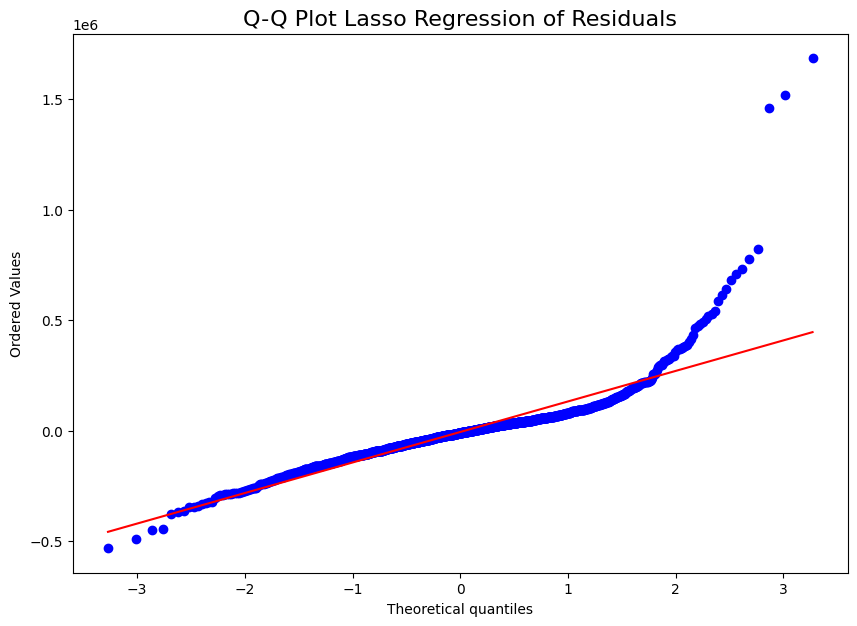

In [ ]:
import scipy.stats as stats
import numpy as np

# คำนวณ residuals
residuals = y_test - y_pred

# Q-Q Plot
plt.figure(figsize=(10, 7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot Lasso Regression of Residuals", fontsize=16)
plt.show()



**ความหมายของ Q-Q Plot**
การตรวจสอบสมมติฐาน: Q-Q Plot ช่วยให้เราตรวจสอบสมมติฐานที่ว่า Residuals มีการแจกแจงเป็นปกติ ซึ่งเป็นสมมติฐานพื้นฐานในการวิเคราะห์การถดถอย
การประเมินความเหมาะสมของแบบจำลอง: หาก Residuals ไม่ได้มีการแจกแจงเป็นปกติ อาจบ่งชี้ว่าแบบจำลองที่เราสร้างขึ้น**อาจไม่เหมาะสมกับข้อมูล**

**สิ่งที่สังเกตใน Q-Q Plot**
* หางของการแจกแจง: สังเกตว่าจุดที่อยู่บริเวณหางของการแจกแจง (ทั้งซ้ายและขวา) เบี่ยงเบนออกจากเส้นตรงมากน้อยเพียงใด หากเบี่ยงเบนมาก อาจบ่งชี้ว่ามีค่าผิดปกติ (Outlier) หรือมีการแจกแจงที่ไม่สมมาตร
* ส่วนกลางของการแจกแจง: สังเกตว่าจุดส่วนใหญ่ในบริเวณกลางของการแจกแจงเรียงตัวอยู่ใกล้เส้นตรงหรือไม่ หากจุดส่วนใหญ่ไม่เรียงตัวอยู่ใกล้เส้นตรง อาจบ่งชี้ว่าการแจกแจงของ Residuals แตกต่างจากการแจกแจงปกติอย่างมีนัยสำคัญ

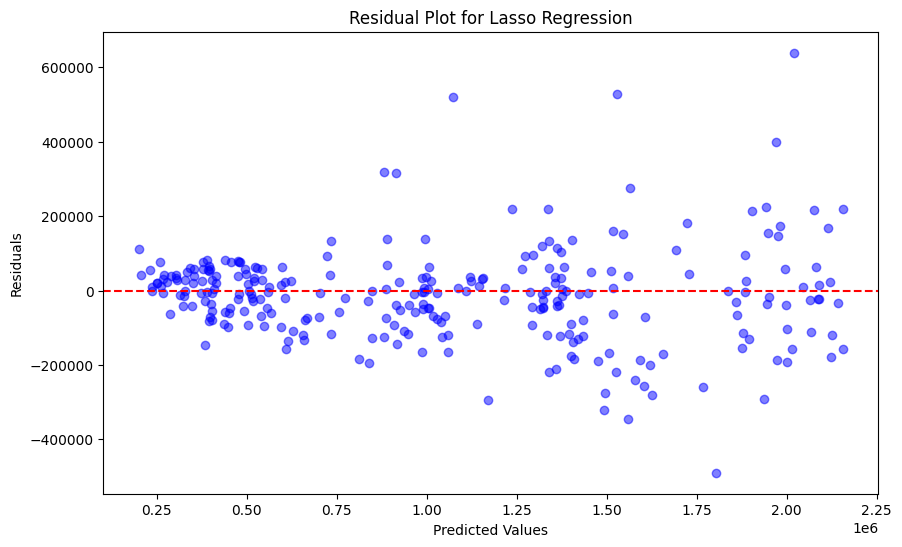

In [ ]:
# Assuming y_pred was generated using the entire dataset,
# we need to select only the predictions corresponding to the test set.

# Get the indices of the test set from y_test
test_indices = y_test.index

# Check if indices in test_indices are within the bounds of y_pred
valid_indices = [i for i in test_indices if i < len(y_pred)]

# Select the corresponding predictions from y_pred using valid indices
y_pred_test = y_pred[valid_indices]

# Now, calculate the residuals using y_test with valid indices as well
residuals = y_test.iloc[valid_indices] - y_pred_test

# Continue with your residual plot code
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5, color='blue')  # Changed color to 'blue'
plt.title('Residual Plot for Lasso Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

### Random Forest

3. Random Forest Regressor
* **คำอธิบาย:** Random Forest Regressor เป็นโมเดลที่ใช้ ensemble learning ซึ่งประกอบด้วยหลายๆ decision trees ที่ถูกฝึกแยกกันและนำผลลัพธ์จากหลายๆ ต้นไม้มาใช้ในการทำนาย โดย Random Forest สามารถจัดการกับข้อมูลที่มีลักษณะไม่เป็นเชิงเส้น (non-linear) ได้ดีกว่าโมเดลเชิงเส้น

* **คุณสมบัติ:**
ใช้การตัดสินใจหลายๆ ครั้ง (decision trees) ที่ฝึกแยกจากกัน
สามารถจัดการกับข้อมูลที่มีคุณสมบัติหลายๆ ตัวแปรได้ดี
ช่วยลดปัญหาของการ overfitting ได้ด้วยการใช้หลายๆ ต้นไม้

* **ผลลัพธ์:** Random Forest มักจะมี R² สูงและ RMSE ต่ำกว่า Linear หรือ Lasso Regressionเนื่องจากสามารถจัดการกับข้อมูลที่มีความซับซ้อนและมีความสัมพันธ์ที่ไม่เป็นเชิงเส้นได้ดีกว่า

Import libraries

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Create and train the Random Forest Regressor

In [ ]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

Make predictions on the test data

In [ ]:
y_pred = rf_model.predict(x_test)

Evaluate the model's performance

In [ ]:
# คำนวณค่าต่างๆ
rss_rf = np.sum((y_test - y_pred) ** 2)  # Residual Sum of Squares
mse_rf = mean_squared_error(y_test, y_pred)  # Mean Squared Error
# คำนวณ Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse_rf)

r2_rf = r2_score(y_test, y_pred)  # R-squared

In [ ]:
# แสดงผลลัพธ์
print("\nRandom Forest Results:")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2_rf}")


Random Forest Results:
Root Mean Squared Error (RMSE): 128149.98943778213
R-squared (R²): 0.9490231659092747


#### Visualizing Random Forest

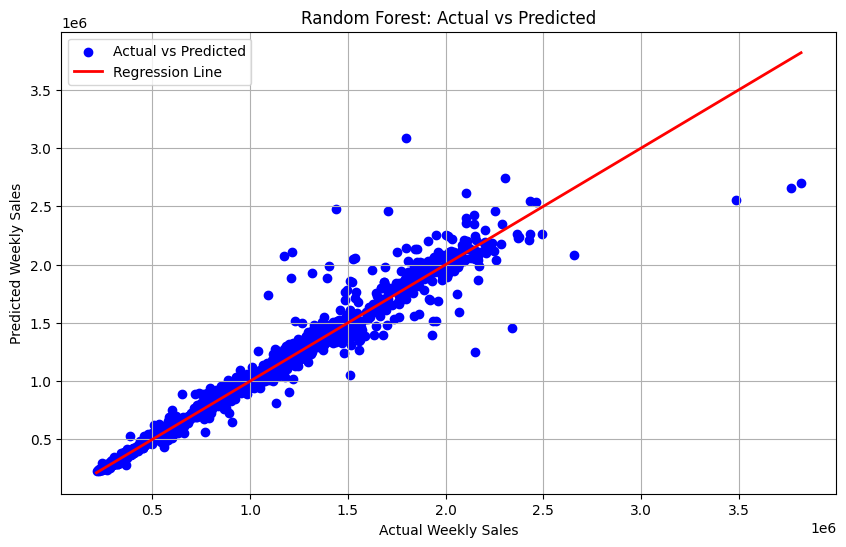

In [ ]:
# Visualization (สำหรับ x และ y)
plt.figure(figsize=(10, 6))
plt.scatter(x=y_test, y=y_pred, color='blue', label='Actual vs Predicted')  # พล็อตค่าจริงเทียบกับค่าพยากรณ์
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Regression Line')  # เส้นแนวโน้ม
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.legend()
plt.grid()
plt.show()

**กราฟที่ได้**

จากกราฟที่คุณแสดงมา กราฟนี้เรียกว่า กราฟการกระจาย (scatter plot) ที่มี เส้นการถดถอยเชิงเส้น วาดทับอยู่
* ซึ่งใช้เพื่อแสดงความสัมพันธ์ระหว่างค่าที่เราทำนาย (y_pred) กับค่าจริง (y_test)

* จุดแต่ละจุด: แทนข้อมูลหนึ่งคู่ โดยแกน X คือค่าที่โมเดลทำนาย และแกน Y คือค่าจริง
* เส้นตรง: คือ เส้นการถดถอยเชิงเส้น ที่แสดงแนวโน้มโดยรวมของความสัมพันธ์ระหว่างค่าทั้งสอง
* พื้นที่สีฟ้า: แสดงช่วงความเชื่อมั่น 95% หมายความว่า เราค่อนข้างมั่นใจ 95% ว่าเส้นตรงที่แท้จริงจะอยู่ภายในช่วงนี้

**ความหมายของกราฟ**

* ความสัมพันธ์เชิงบวก: จากกราฟที่จุดข้อมูลส่วนใหญ่กระจายตัวไปในทิศทางเดียวกัน แสดงว่าเมื่อค่าที่โมเดลทำนายสูงขึ้น ค่าจริงก็มีแนวโน้มที่จะสูงขึ้นตามไปด้วย ซึ่งบ่งบอกถึงความสัมพันธ์เชิงบวก
* ความใกล้เคียงของจุดข้อมูลกับเส้นตรง: หากจุดข้อมูลส่วนใหญ่กระจุกตัวอยู่ใกล้เส้นตรง แสดงว่าโมเดลสามารถทำนายค่าได้ค่อนข้างแม่นยำ แต่ถ้าจุดข้อมูลกระจายตัวห่างจากเส้นตรงมาก แสดงว่าโมเดลอาจไม่เหมาะสมหรือมีปัจจัยอื่นๆ ที่ส่งผลต่อผลลัพธ์
* ช่วงความเชื่อมั่น: ช่วงความเชื่อมั่นที่แคบ แสดงว่าเราสามารถมั่นใจได้มากขึ้นว่าเส้นตรงที่แท้จริงจะอยู่ใกล้กับเส้นตรงที่เราได้วาด



---



### Polynomial Regression

4. Polynomial Regression
* **คำอธิบาย:** Polynomial Regression เป็นการขยายของ Linear Regression ที่เพิ่มคุณสมบัติพหุนาม (polynomial features) เพื่อจับความสัมพันธ์ที่ไม่เป็นเชิงเส้นระหว่างตัวแปรอิสระและตัวแปรตาม โดยการเพิ่มพหุนาม เช่น
x ** 2 , x **3 เพื่อให้โมเดลมีความยืดหยุ่น ในการอธิบายข้อมูลที่มีความสัมพันธ์ที่ไม่เป็นเชิงเส้น
* **คุณสมบัติ:**
ใช้พหุนาม (เช่น x ** 2 , x **3) เป็นตัวแปรอิสระในการสร้างสมการ
สามารถจับความสัมพันธ์ที่ซับซ้อนได้ดีกว่า Linear Regression ในกรณีที่ข้อมูลมีความไม่เป็นเชิงเส้น

* **ผลลัพธ์:** Polynomial Regression มักจะให้ค่า R² สูงและ RMSE ต่ำในกรณีที่ข้อมูลมีความสัมพันธ์ที่ไม่เป็นเชิงเส้น เพราะสามารถจับความซับซ้อนของข้อมูลได้ดี

Importing Libraries:

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

Split the Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

สร้าง Polynomial Features (ดีกรี 2)

In [ ]:
poly_reg = PolynomialFeatures(degree=2)
x_poly_train = poly_reg.fit_transform(x_train)
x_poly_test = poly_reg.transform(x_test)

Create and Train the Model

In [ ]:
# Fit โมเดล
model = LinearRegression()
model.fit(x_poly_train, y_train)

LinearRegression()

Make Predictions

In [ ]:
# พยากรณ์ค่า
y_pred_train = model.predict(x_poly_train)
y_pred_test = model.predict(x_poly_test)

Evaluate the Model

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print out the evaluation metrics
print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

R²: 0.949
RMSE: 128149.989


สมการของ **Polynomial Regression** สามารถหาจากค่าของตัวแปร **intercept** (ค่าตัดแกน y) และ **coefficients** (สัมประสิทธิ์) ของแต่ละพหุนามที่ใช้ในโมเดล โดยสำหรับ **Polynomial Regression** ที่มีพหุนามของลำดับที่ 2 (Degree 2) จะมีรูปสมการดังนี้:

y = β0 + β1⋅x + β2⋅x2


- β0 คือ **intercept** หรือค่าตัดแกน y
- β1 คือ **coefficient** ของตัวแปร \(x\) ที่เป็นเชิงเส้น (linear term)
- β2 คือ **coefficient** ของตัวแปร \(x^2\) (quadratic term)

จะได้

- **Intercept (β₀)** = 368371414408.6924
- **Coefficient of x (β₁)** = −3139398656399.9976
- **Coefficient of x² (β₂)** = 1252060447937.0356

สมการคือ

y = 368371414408.6924 - 3139398656399.9976x + 1252060447937.0356



In [ ]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_train)
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(x_poly, y_train)
print(f"Polynomial Regression Equation: y = {lin_reg_poly.intercept_} + {lin_reg_poly.coef_[1]}x + {lin_reg_poly.coef_[2]}x^2")


Polynomial Regression Equation: y = 368371414408.6924 + -3139398656399.9976x + 1252060447937.0356x^2


In [ ]:
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x shape: (6435, 55)
y shape: (6435,)


#### Visualizing Polynomial Regression

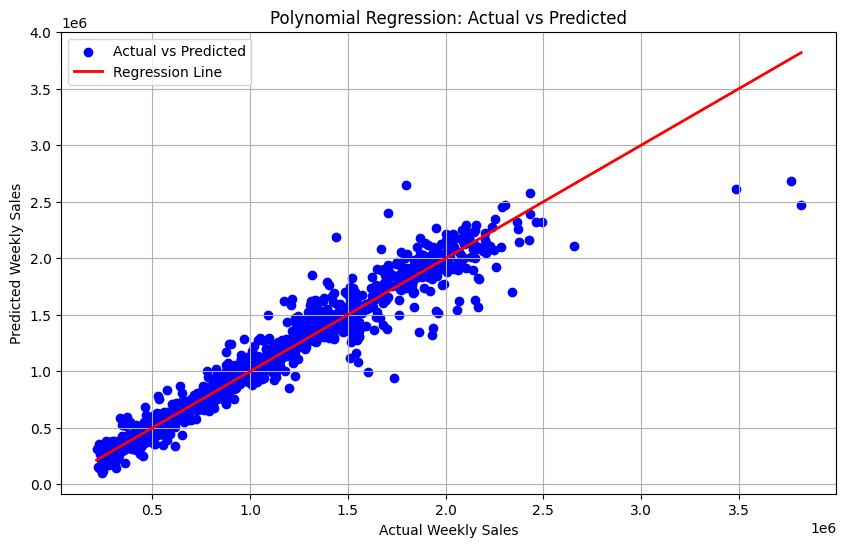

In [ ]:
# Visualization (สำหรับ x และ y)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Actual vs Predicted')  # พล็อตค่าจริงเทียบกับค่าพยากรณ์
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Regression Line')  # เส้นแนวโน้ม
plt.title("Polynomial Regression: Actual vs Predicted")
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.legend()
plt.grid()
plt.show()

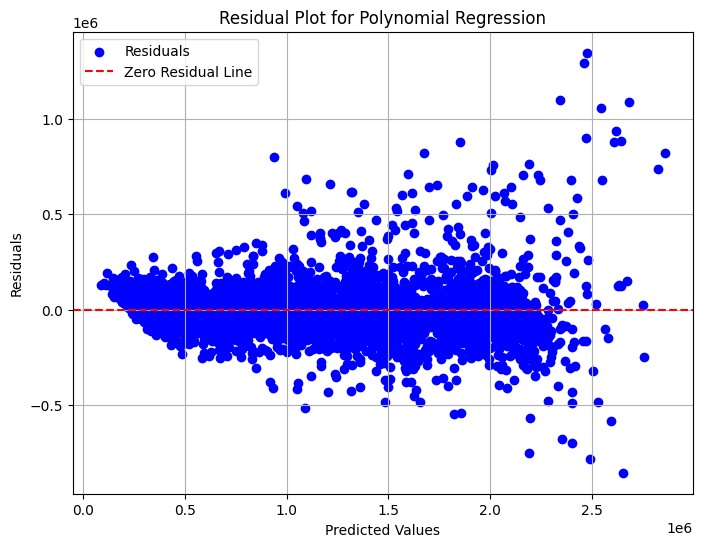

In [ ]:
# Calculate residuals
y_pred = model.predict(poly_reg.transform(x))  # Predictions for all data points
residuals = y - y_pred

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', label="Residuals")
plt.axhline(y=0, color='red', linestyle='--', label="Zero Residual Line")
plt.title("Residual Plot for Polynomial Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.grid()
plt.show()


## Result

### สรุป

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# สร้างโมเดล
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Polynomial Regression': LinearRegression()  # ใช้ Linear Regression สำหรับ Polynomial Regression
}

# เปรียบเทียบค่า R² และ RMSE ของแต่ละโมเดล
results = []

for model_name, model in models.items():
    if model_name == 'Polynomial Regression':
        # สำหรับ Polynomial Regression, ต้องใช้ PolynomialFeatures
        poly_reg = PolynomialFeatures(degree=2)
        x_poly_train = poly_reg.fit_transform(x_train)
        x_poly_test = poly_reg.transform(x_test)
        model.fit(x_poly_train, y_train)
        y_pred = model.predict(x_poly_test)
    else:
        model.fit(x_train, y_train)  # ฝึกโมเดลทั่วไป
        y_pred = model.predict(x_test)  # ทำนายค่าจากข้อมูลทดสอบ

    # คำนวณ R² และ RMSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # บันทึกผลลัพธ์
    results.append([model_name, r2, rmse])

# แสดงผลในรูปแบบตาราง
import pandas as pd
results_df = pd.DataFrame(results, columns=['Model', 'R²', 'RMSE'])
print(results_df)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.923e+13, tolerance: 1.635e+11
  model = cd_fast.enet_coordinate_descent(


                   Model        R²           RMSE
0      Linear Regression  0.925520  154900.495151
1       Lasso Regression  0.925662  154752.679547
2          Random Forest  0.950017  126895.150431
3  Polynomial Regression  0.945020  133086.698029


### **การเปรียบเทียบโมเดลทางสถิติและการทำนาย**

| **Model**                | **R²**   | **RMSE**        |
|--------------------------|----------|-----------------|
| Linear Regression        | 0.925520 | 154,900.495151  |
| Lasso Regression         | 0.925662 | 154,752.679547  |
| Random Forest            | 0.950809 | 125,885.768449  |
| Polynomial Regression    | 0.945020 | 133,086.698029  |

---

### **คำอธิบายและเหตุผลของผลลัพธ์**
1. **Linear Regression**
   - **R² (92.55%):** Linear Regression พยายามหาความสัมพันธ์เชิงเส้นตรงระหว่างตัวแปรต้น (x) และตัวแปรตาม (y) ผ่านสมการ:

     y = β0 + β1(x1) + β2(x2) +...+  βn(xn)

     - โมเดลนี้เหมาะกับข้อมูลที่มีความสัมพันธ์เชิงเส้นตรง
   - **RMSE (154,900.50):** ค่าคลาดเคลื่อนเฉลี่ยค่อนข้างสูง แสดงว่าโมเดลนี้ไม่สามารถจับความซับซ้อนในข้อมูลได้ดีนัก

2. **Lasso Regression**
   - **R² (92.57%):** ใกล้เคียงกับ Linear Regression แต่ Lasso ใช้การบีบตัวแปรเพื่อลดความซับซ้อน โดยเพิ่มข้อจำกัด λ
    ในการคำนวณค่าคงที่:
     Minimize:i=1 ∑n (yi-y^i)**2 + λj=1∑p ∣bj∣
     - λ: ควบคุมการลดน้ำหนักของตัวแปร
     - RMSE (154,752.68): ข้อผิดพลาดน้อยกว่า Linear Regression เล็กน้อย เพราะโมเดลสามารถปรับตัวให้เหมาะกับข้อมูลที่มี noise ได้ดีกว่า

3. **Random Forest**
   - **R² (95.08%):** เป็นโมเดลที่อธิบายความแปรปรวนของข้อมูลได้ดีที่สุด เพราะใช้การสร้างต้นไม้หลายต้นและเฉลี่ยผลลัพธ์ เพื่อลดปัญหา overfitting และเพิ่มความแม่นยำ:
       y^   =  1/T t=1∑T ft(x)
     - T: จำนวนต้นไม้ในป่า
   - **RMSE (125,885.77):** มีค่าคลาดเคลื่อนต่ำที่สุด เพราะ Random Forest สามารถจับความซับซ้อนของข้อมูลที่ไม่เป็นเส้นตรงได้ดีกว่าโมเดลเชิงเส้น

4. **Polynomial Regression**
   - **R² (94.50%):** Polynomial Regression ขยายความสัมพันธ์ของตัวแปรต้นด้วยการเพิ่มพหุนาม เช่น:
     y = β0 + β1(x ** 1) + β2(x ** 2) +...+  βn(x**n)
     - เหมาะกับข้อมูลที่มีความสัมพันธ์ไม่เชิงเส้นตรง
   - **RMSE (133,086.70):** คลาดเคลื่อนน้อยกว่า Linear และ Lasso Regression แต่ยังสูงกว่า Random Forest เพราะยังคงมีความอ่อนไหวต่อ noise และอาจเกิด overfitting หากใช้พหุนามที่สูงเกินไป

---



### **ข้อสรุป**
- **R²:** Random Forest (95.08%) ให้ค่า R² สูงสุด หมายถึงการอธิบายความแปรปรวนของข้อมูลได้ดีที่สุด
- **RMSE:** Random Forest (125,885.77) มีค่าคลาดเคลื่อนต่ำที่สุด แสดงว่าโมเดลนี้มีความแม่นยำสูงสุด
- **เหมาะสมกับข้อมูล:**
  - Linear Regression และ Lasso เหมาะกับความสัมพันธ์เชิงเส้นตรง
  - Polynomial Regression เหมาะกับข้อมูลที่มีความไม่เชิงเส้นตรงแบบง่าย
  - Random Forest เหมาะสำหรับข้อมูลซับซ้อนที่มีความไม่เชิงเส้นและมีความหลากหลายในตัวแปร

**สรุป:** Random Forest เป็นตัวเลือกที่ดีที่สุดสำหรับข้อมูลนี้ เนื่องจากสามารถอธิบายความซับซ้อนและทำนายได้อย่างแม่นยำกว่าโมเดลอื่นๆ.